<a href="https://colab.research.google.com/github/manny-uncharted/pytorch-projects-learnings/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 1 (Analytical question)
Propose an interesting analytical question that can be answered using the given dataset

**Analytical Question:** Determining the chances of a patient having cancer or not.

## Loading our necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

## Data review

In [ ]:
## Importing our data
df = pd.read_csv("/content/cancer-patient-datasets.csv")

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#@title
# Index Column now refers to patient

print('\n')
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# Displaying the dataset rows and columns by through the shape() function
df.shape

(1000, 25)

In [ ]:
# Getting information about the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   int64 
 3   air_pollution             1000 non-null   int64 
 4   alcohol_use               1000 non-null   int64 
 5   dust_allergy              1000 non-null   int64 
 6   occupational_hazards      1000 non-null   int64 
 7   genetic_risk              1000 non-null   int64 
 8   chronic_lung_disease      1000 non-null   int64 
 9   balanced_diet             1000 non-null   int64 
 10  obesity                   1000 non-null   int64 
 11  smoking                   1000 non-null   int64 
 12  passive_smoker            1000 non-null   int64 
 13  chest_pain                1000 non-null   int64 
 14  coughing_of_blood        

In [ ]:
#Check types for all the columns using dtypes
df.dtypes

index                        int64
age                          int64
gender                       int64
air_pollution                int64
alcohol_use                  int64
dust_allergy                 int64
occupational_hazards         int64
genetic_risk                 int64
chronic_lung_disease         int64
balanced_diet                int64
obesity                      int64
smoking                      int64
passive_smoker               int64
chest_pain                   int64
coughing_of_blood            int64
fatigue                      int64
weight_loss                  int64
shortness_of_breath          int64
wheezing                     int64
swallowing_difficulty        int64
clubbing_of_finger_nails     int64
frequent_cold                int64
dry_cough                    int64
snoring                      int64
level                       object
dtype: object

In [ ]:
# Generating statistcal information for every column by looping over the columns and getting these data using describe() function
for column in df.columns:
  print(df[column].describe())
  print("\n---------------------------------\n")

count    1000.000000
mean      499.500000
std       288.819436
min         0.000000
25%       249.750000
50%       499.500000
75%       749.250000
max       999.000000
Name: index, dtype: float64

---------------------------------

count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: age, dtype: float64

---------------------------------

count    1000.000000
mean        1.402000
std         0.490547
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: gender, dtype: float64

---------------------------------

count    1000.0000
mean        3.8400
std         2.0304
min         1.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         8.0000
Name: air_pollution, dtype: float64

---------------------------------

count    1000.000000
mean        4.563000
std         2.620477
min         1.0000

In [ ]:
#checking for null values
df.isnull().any()

index                       False
age                         False
gender                      False
air_pollution               False
alcohol_use                 False
dust_allergy                False
occupational_hazards        False
genetic_risk                False
chronic_lung_disease        False
balanced_diet               False
obesity                     False
smoking                     False
passive_smoker              False
chest_pain                  False
coughing_of_blood           False
fatigue                     False
weight_loss                 False
shortness_of_breath         False
wheezing                    False
swallowing_difficulty       False
clubbing_of_finger_nails    False
frequent_cold               False
dry_cough                   False
snoring                     False
level                       False
dtype: bool

The above code tells us that there's no missing data present in the dataset

In [ ]:
#check for duplicates
df.duplicated().sum()

0

The above implies that no duplicates were found

In [ ]:
# checking for the count of unique values in each column
for column in df.columns:
    print(df[column].value_counts())

0      1
671    1
658    1
659    1
660    1
      ..
338    1
339    1
340    1
341    1
999    1
Name: index, Length: 1000, dtype: int64
35    77
33    69
38    69
37    51
44    51
27    48
45    42
48    40
26    37
28    32
52    31
32    31
24    30
25    30
62    30
46    23
39    21
36    21
47    20
42    20
19    20
17    20
53    19
22    19
23    19
29    19
18    18
55    11
73    10
34    10
65    10
64    10
61    10
49    10
14     9
31     9
43     1
51     1
54     1
63     1
Name: age, dtype: int64
1    598
2    402
Name: gender, dtype: int64
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: air_pollution, dtype: int64
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: alcohol_use, dtype: int64
7    405
4    133
5    111
6    110
3    101
2     70
1     60
8     10
Name: dust_allergy, dtype: int64
7    365
3    151
2    132
5    130
4    112
1     50
6     30
8     30
Name: occupational_hazards, dtype: int64
7   

## EDA & Data Preprocessing

In [ ]:
# giving labels to our values
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

<BarContainer object of 1000 artists>

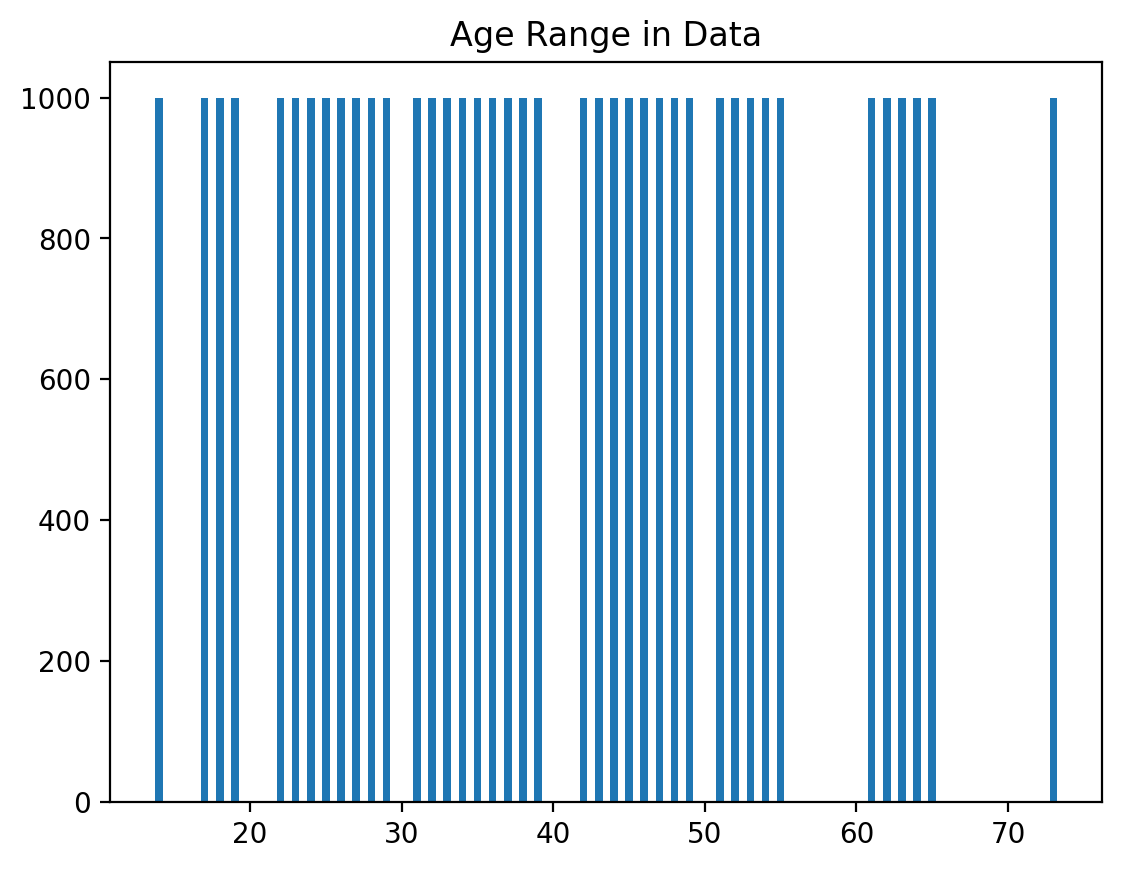

In [ ]:
plt.title("Age Range in Data")
plt.bar(df['age'], height=df.shape[0],width=.5)

In [ ]:
df.columns

Index(['index', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level'],
      dtype='object')

In [ ]:
# Round

print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
index,499.5,288.8,0.0,249.8,499.5,749.2,999.0
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0


In [ ]:
# Histograms
cols = ['index', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level']

cols1 = [
    'age', 'weight_loss', 'smoking'
]

cols2 = [ 'gender']

cols3 = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue'
]
print('\n')



*************************************************************************************************************************


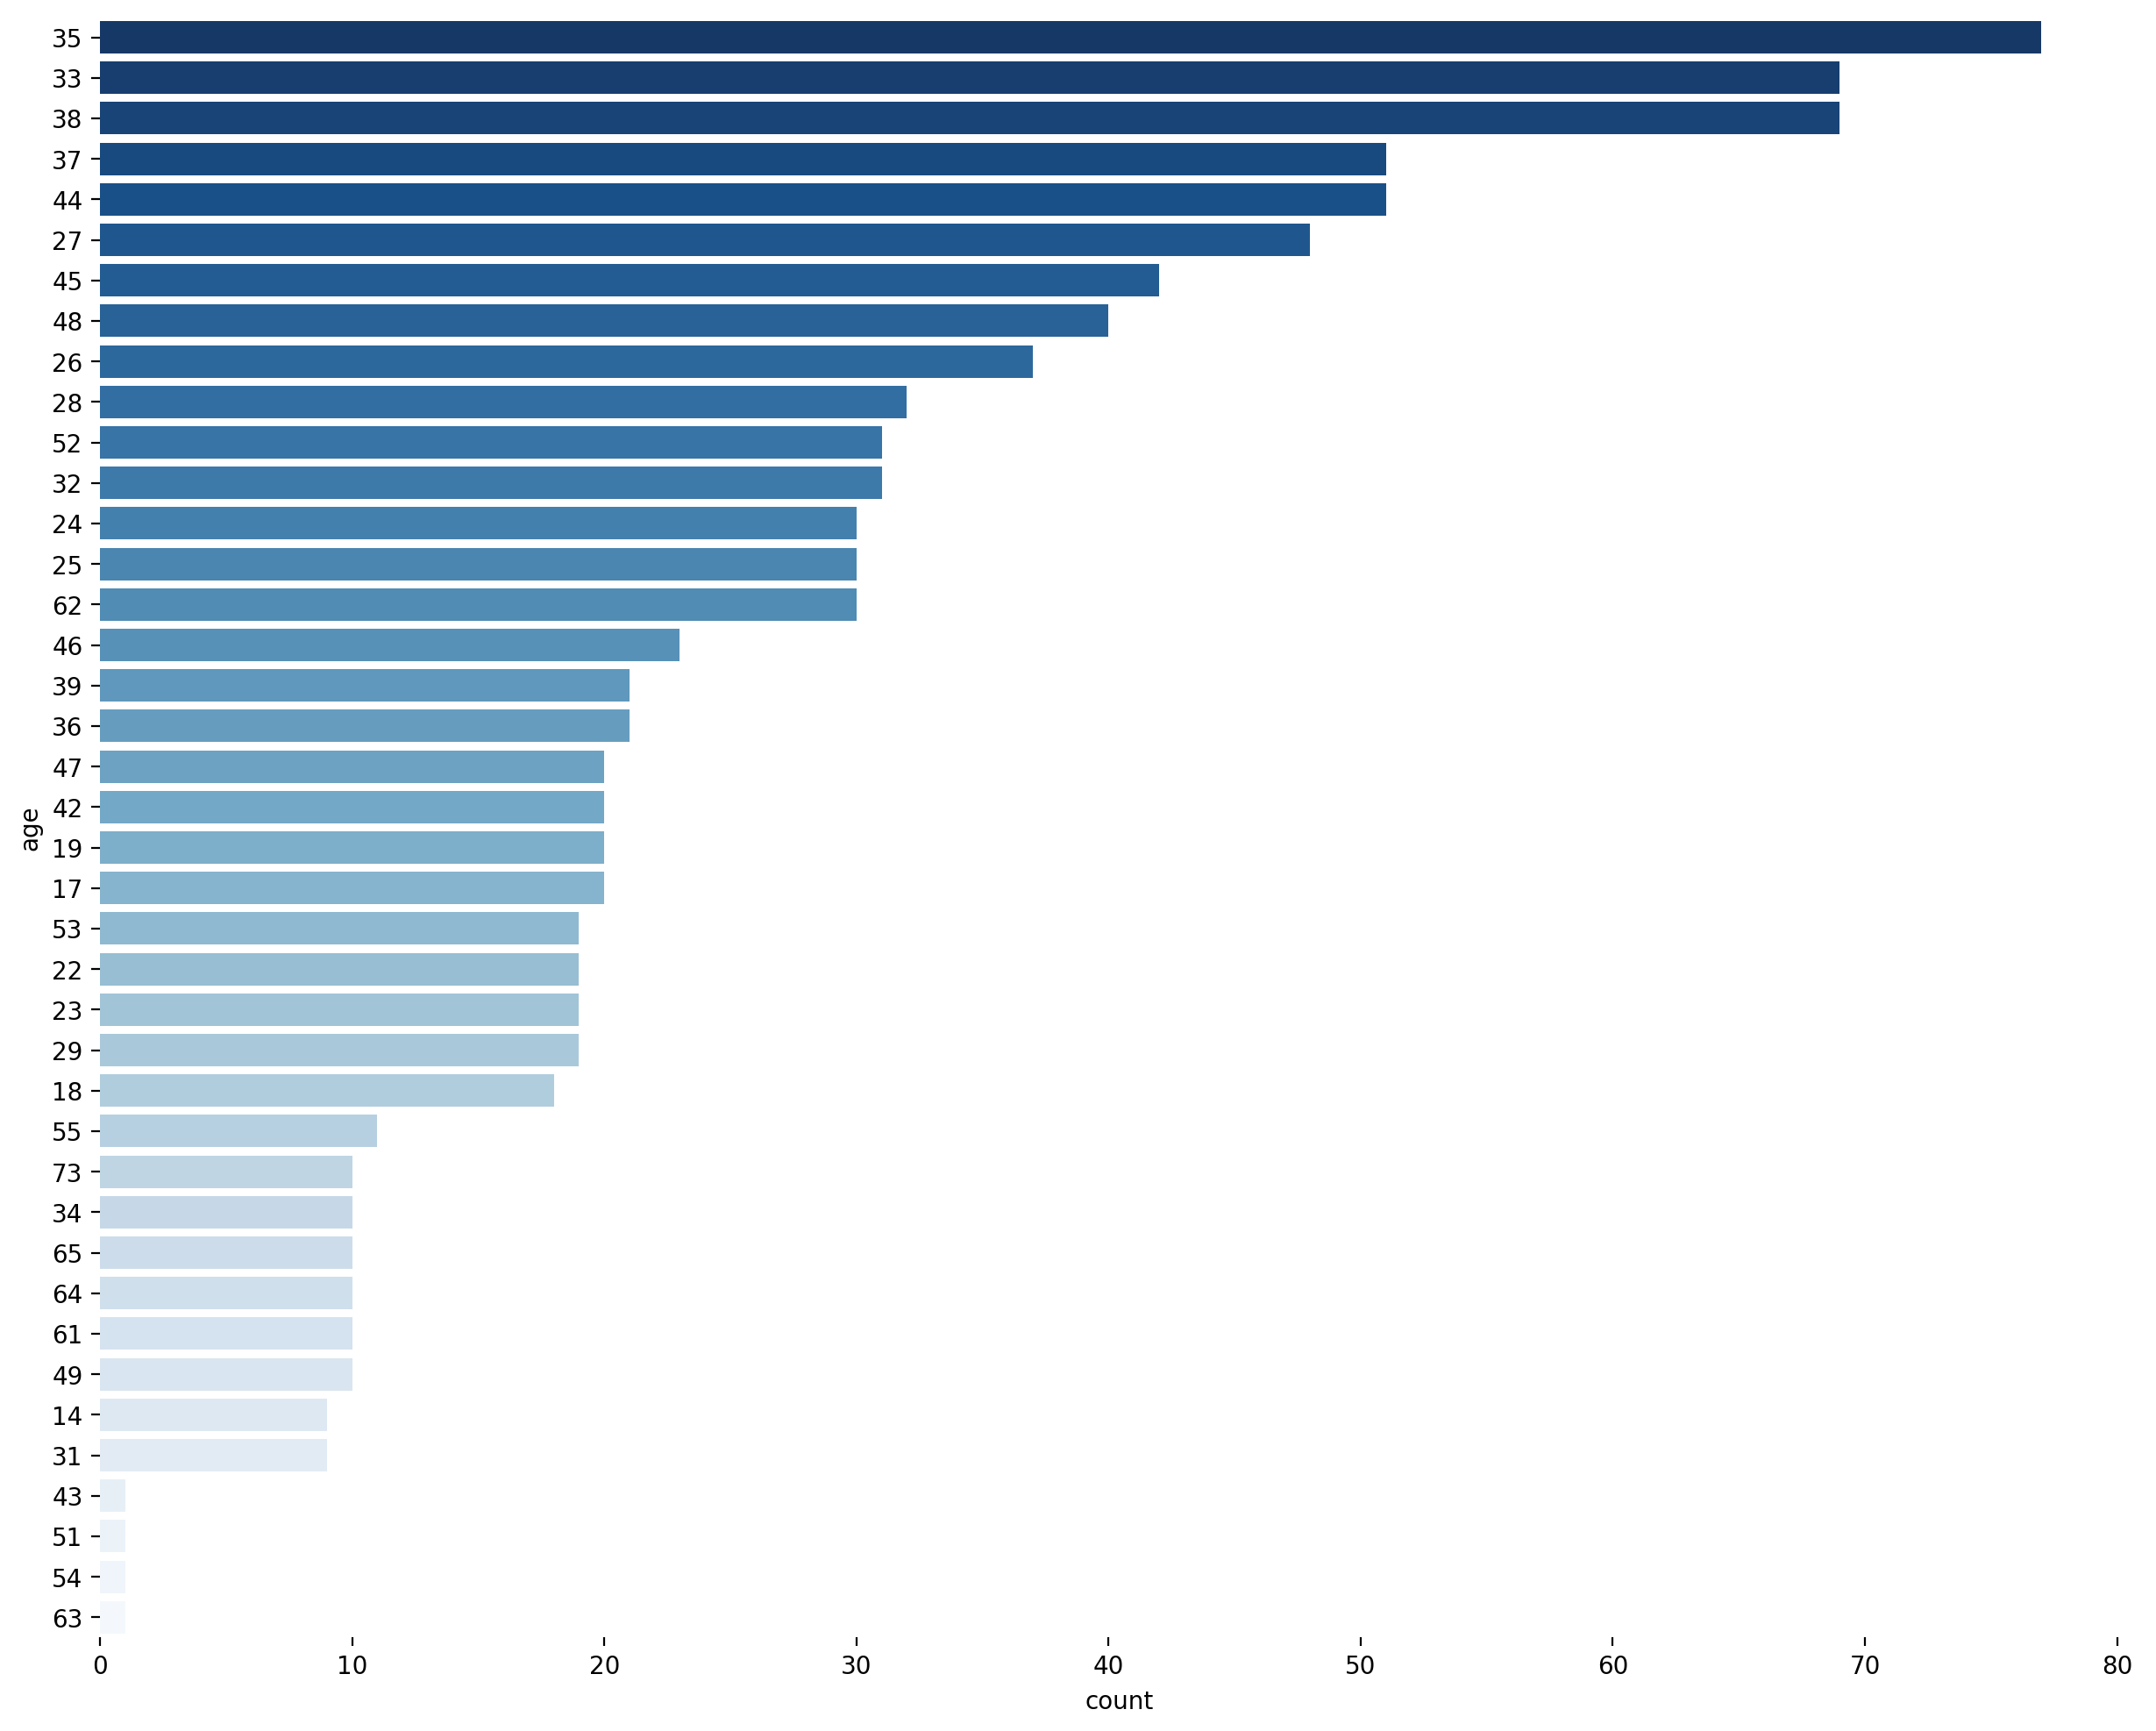

*************************************************************************************************************************


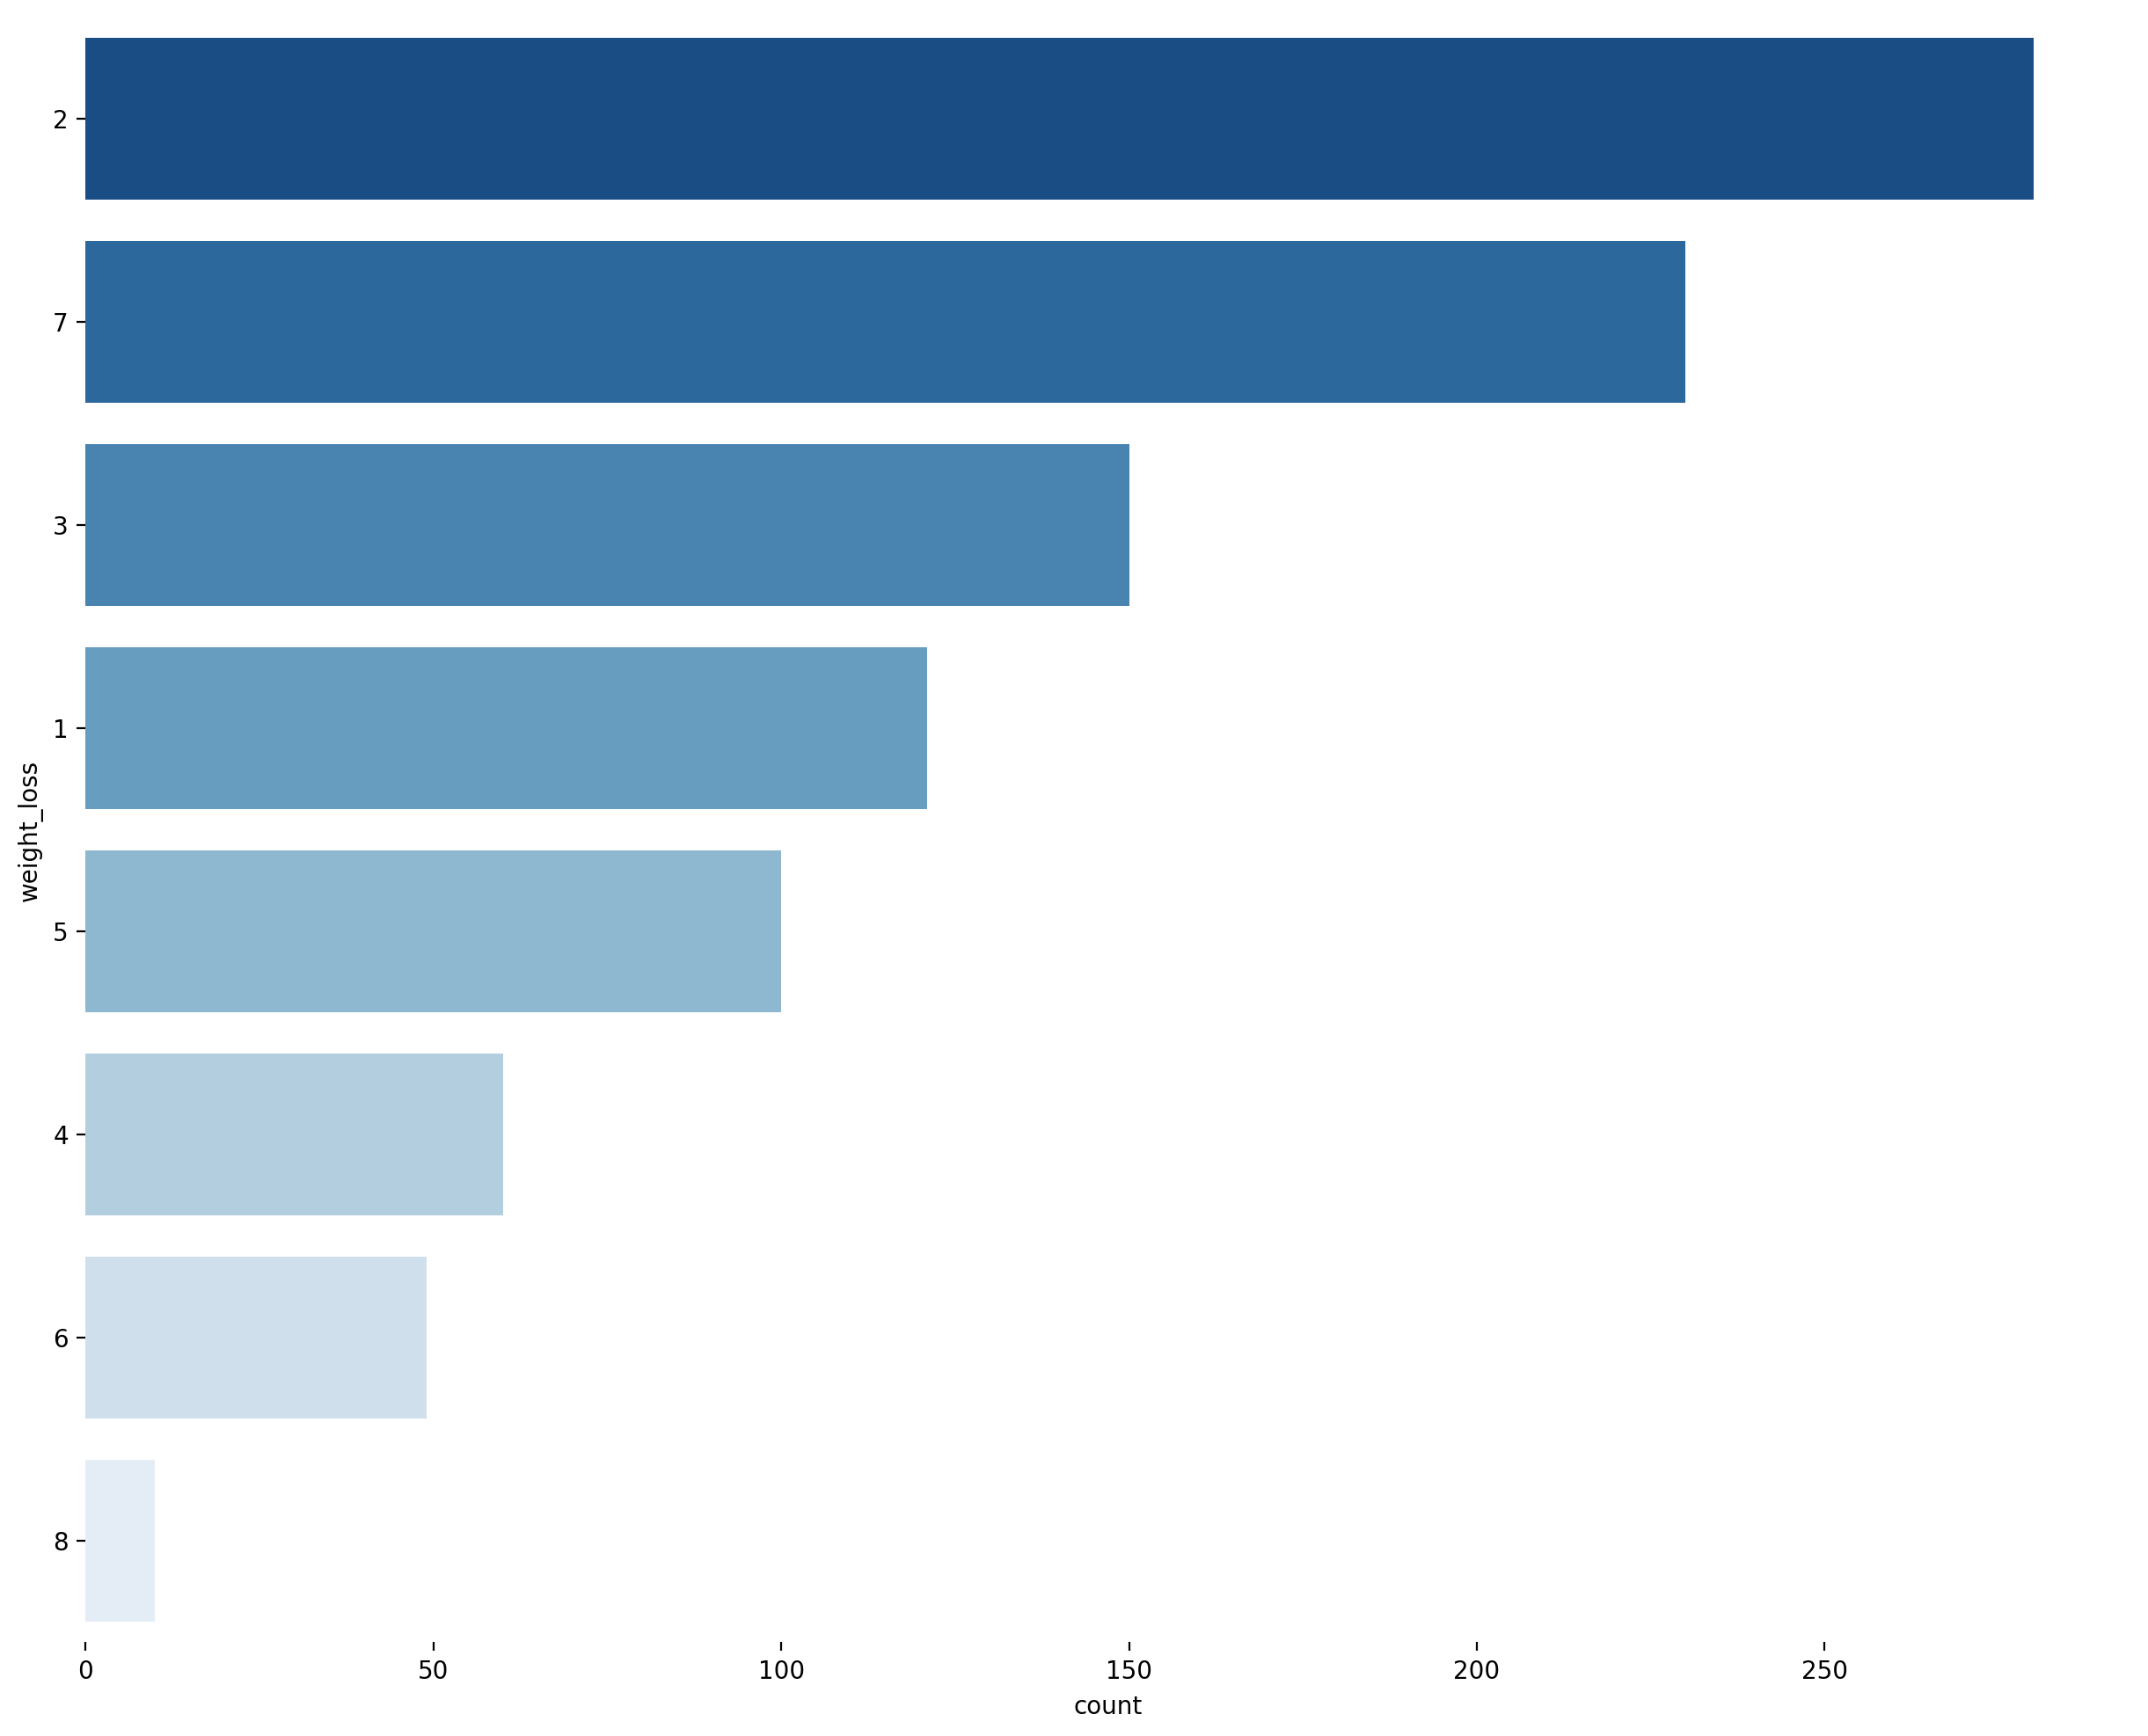

*************************************************************************************************************************


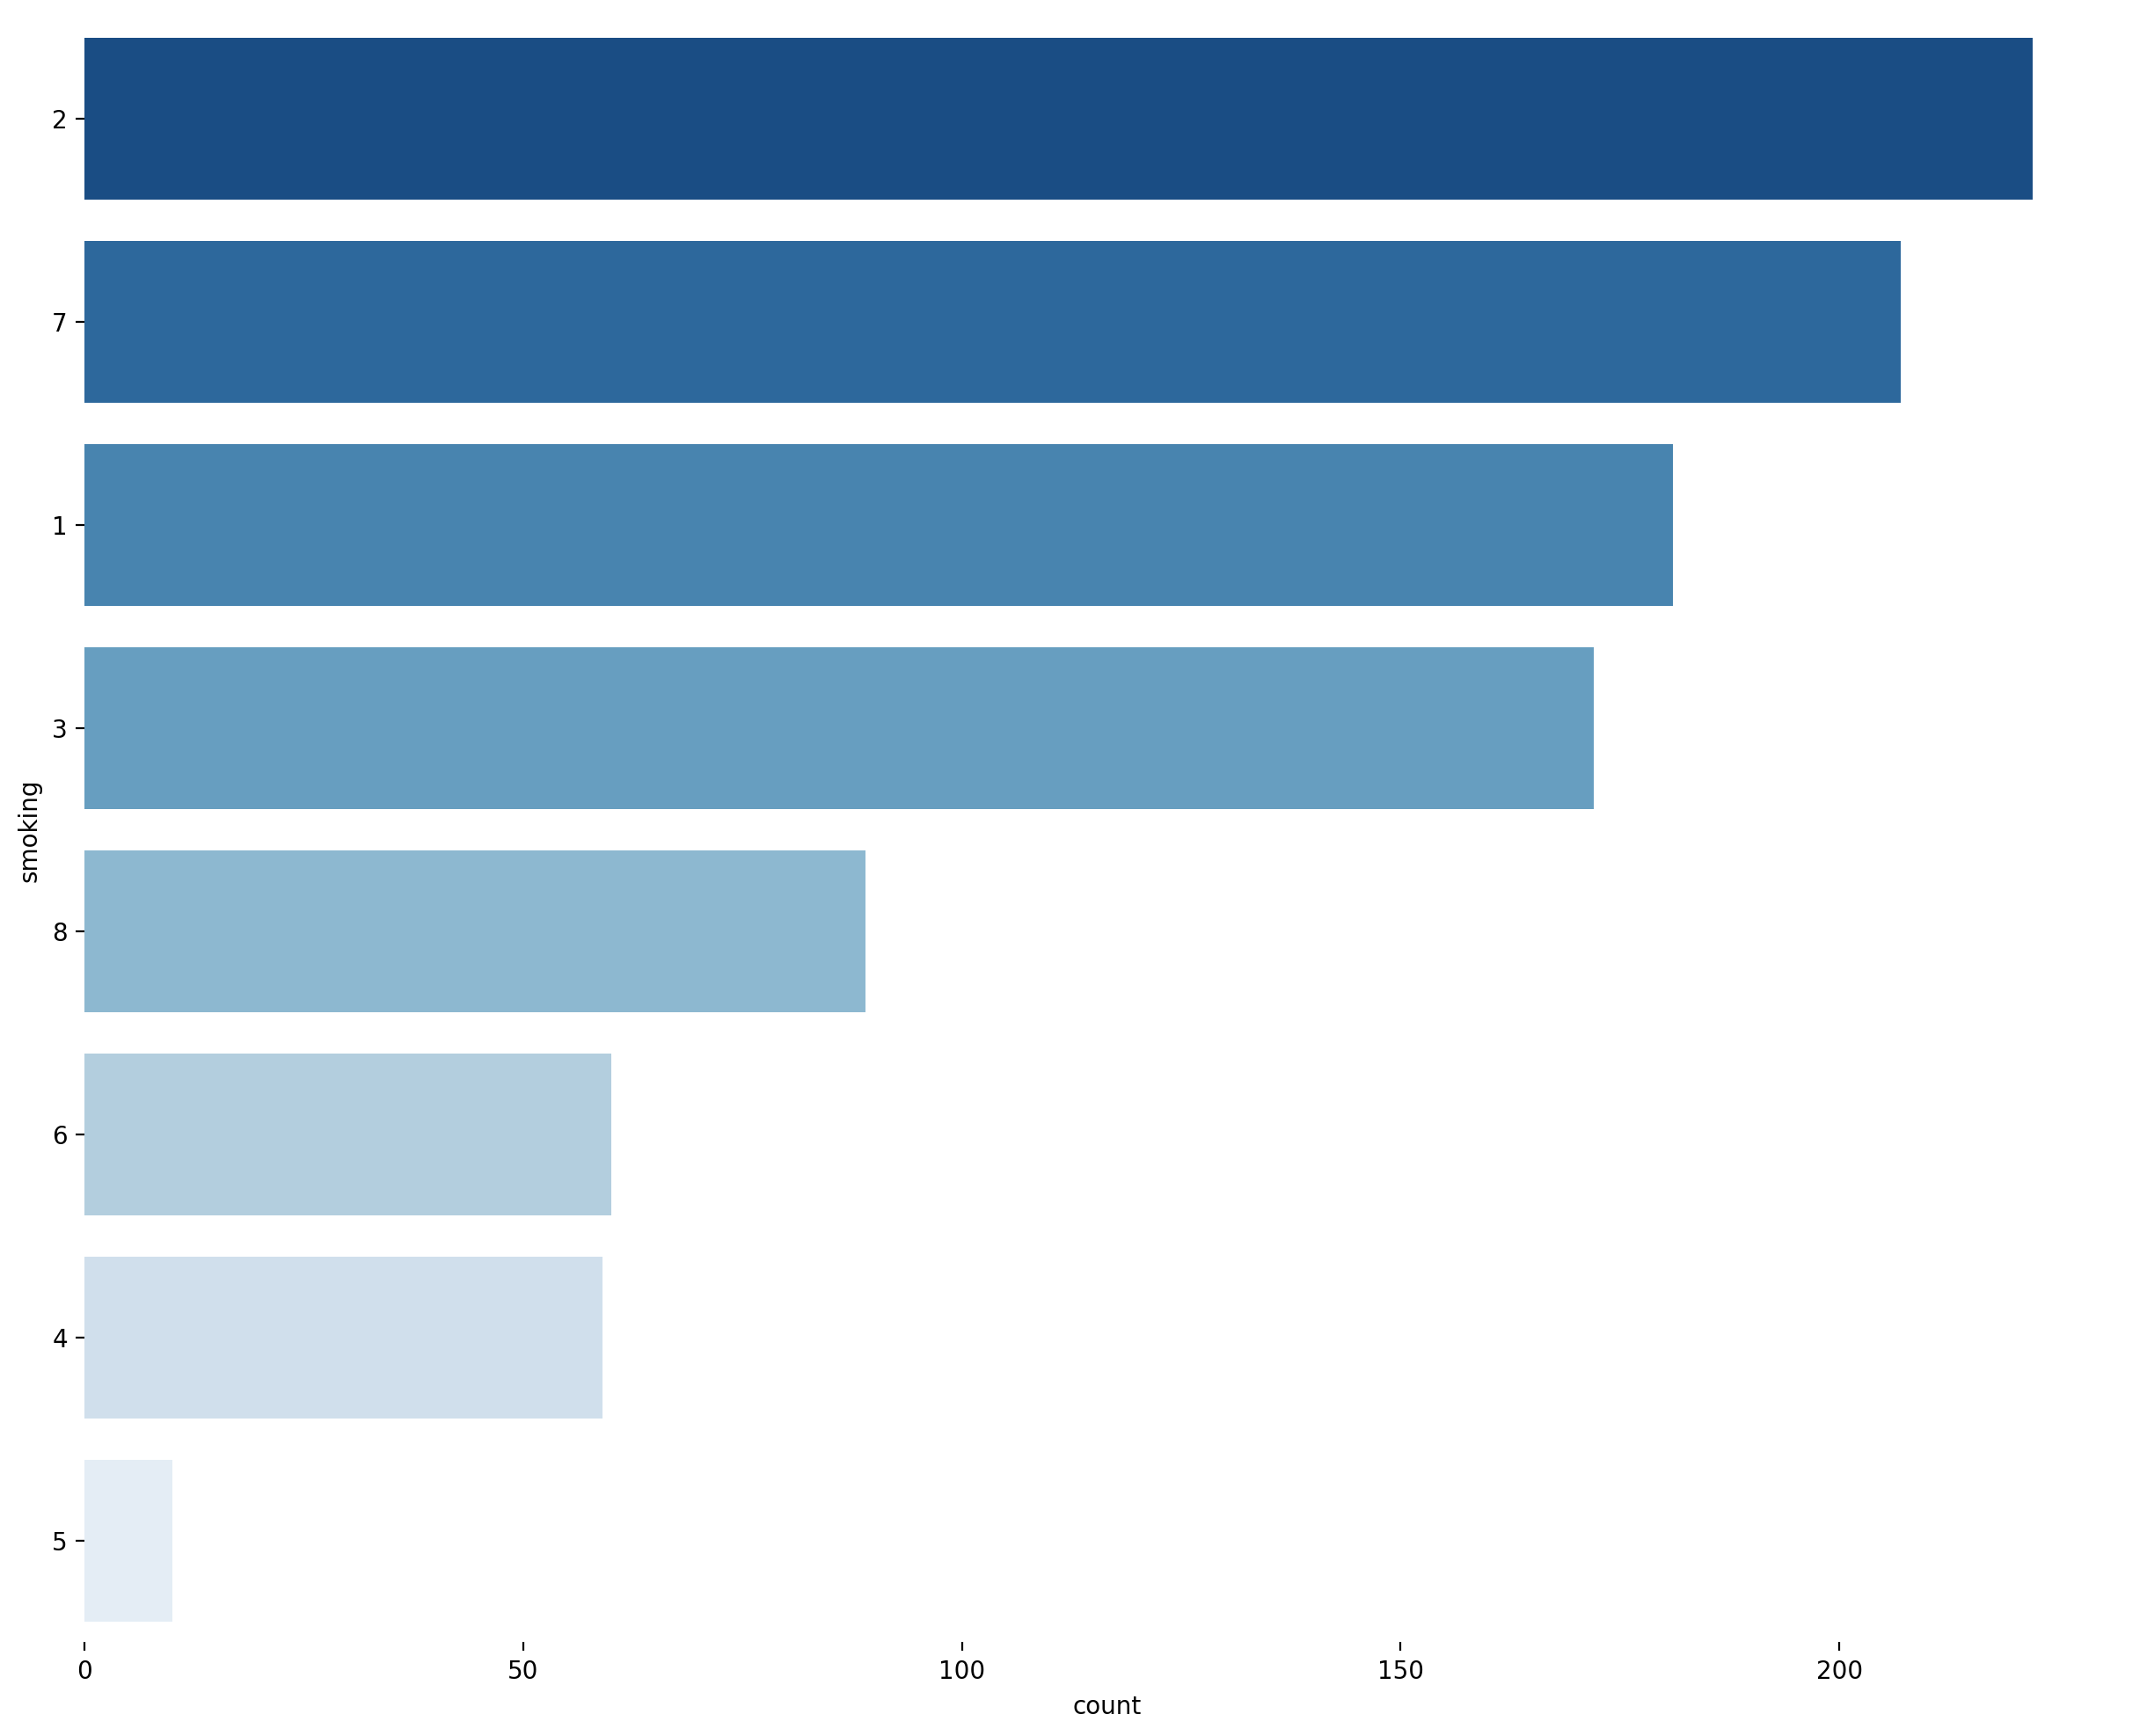

**********************************************************************************************************************


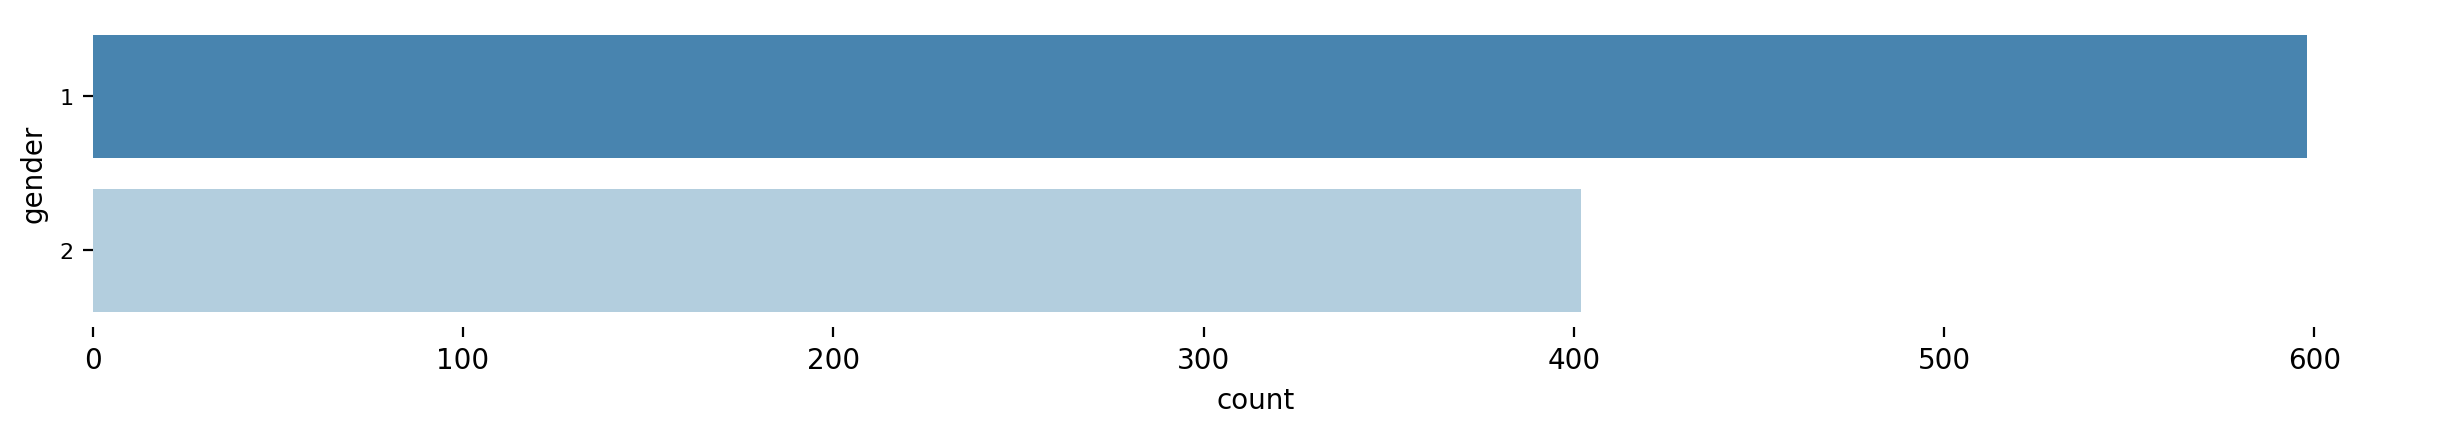

In [ ]:
#Presenting the countplots for categorical features

print('\n')
for i in cols1:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  print("*************************************************************************************************************************")
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    print("**********************************************************************************************************************")
    plt.box(False)
    plt.show()

print('\n')

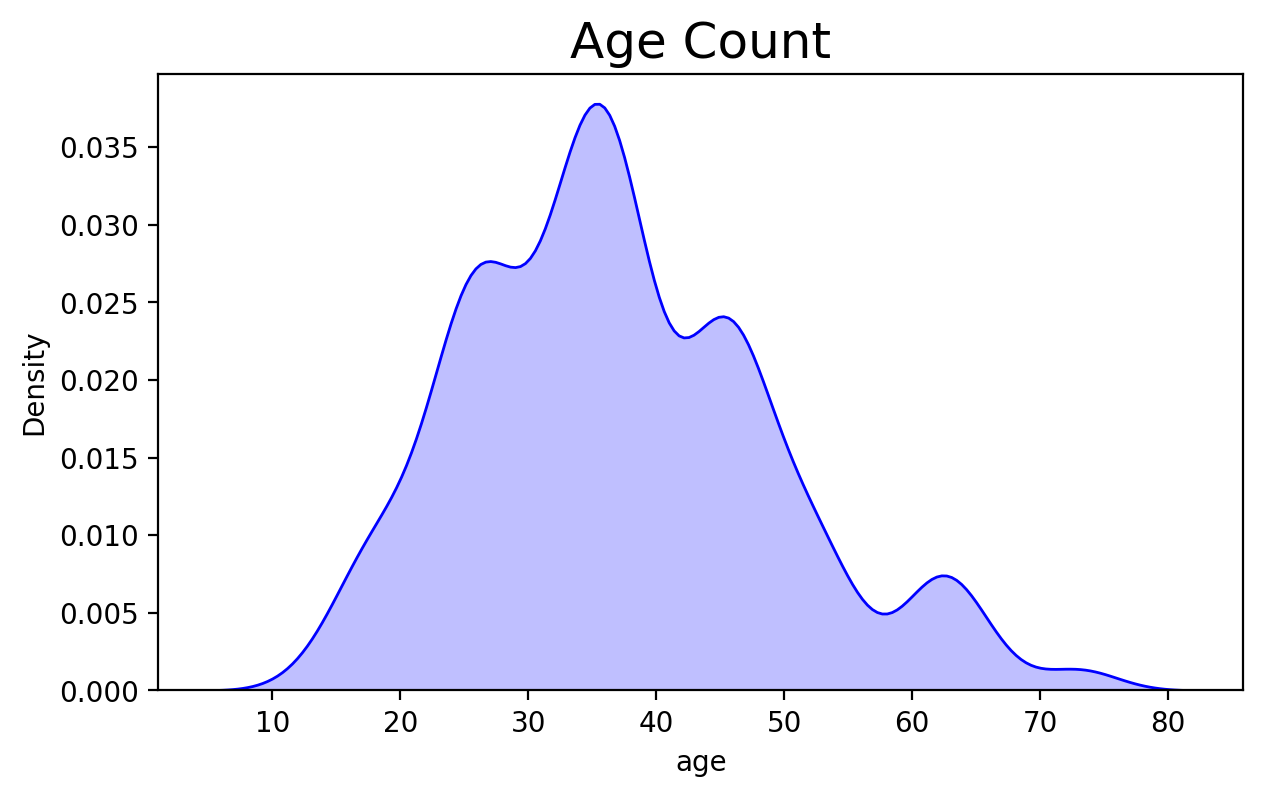

In [ ]:
plt.figure(figsize = (7,4))
sns.kdeplot(df.age, shade = True, color = "b")
plt.title("Age Count", fontsize = 18)
plt.show()

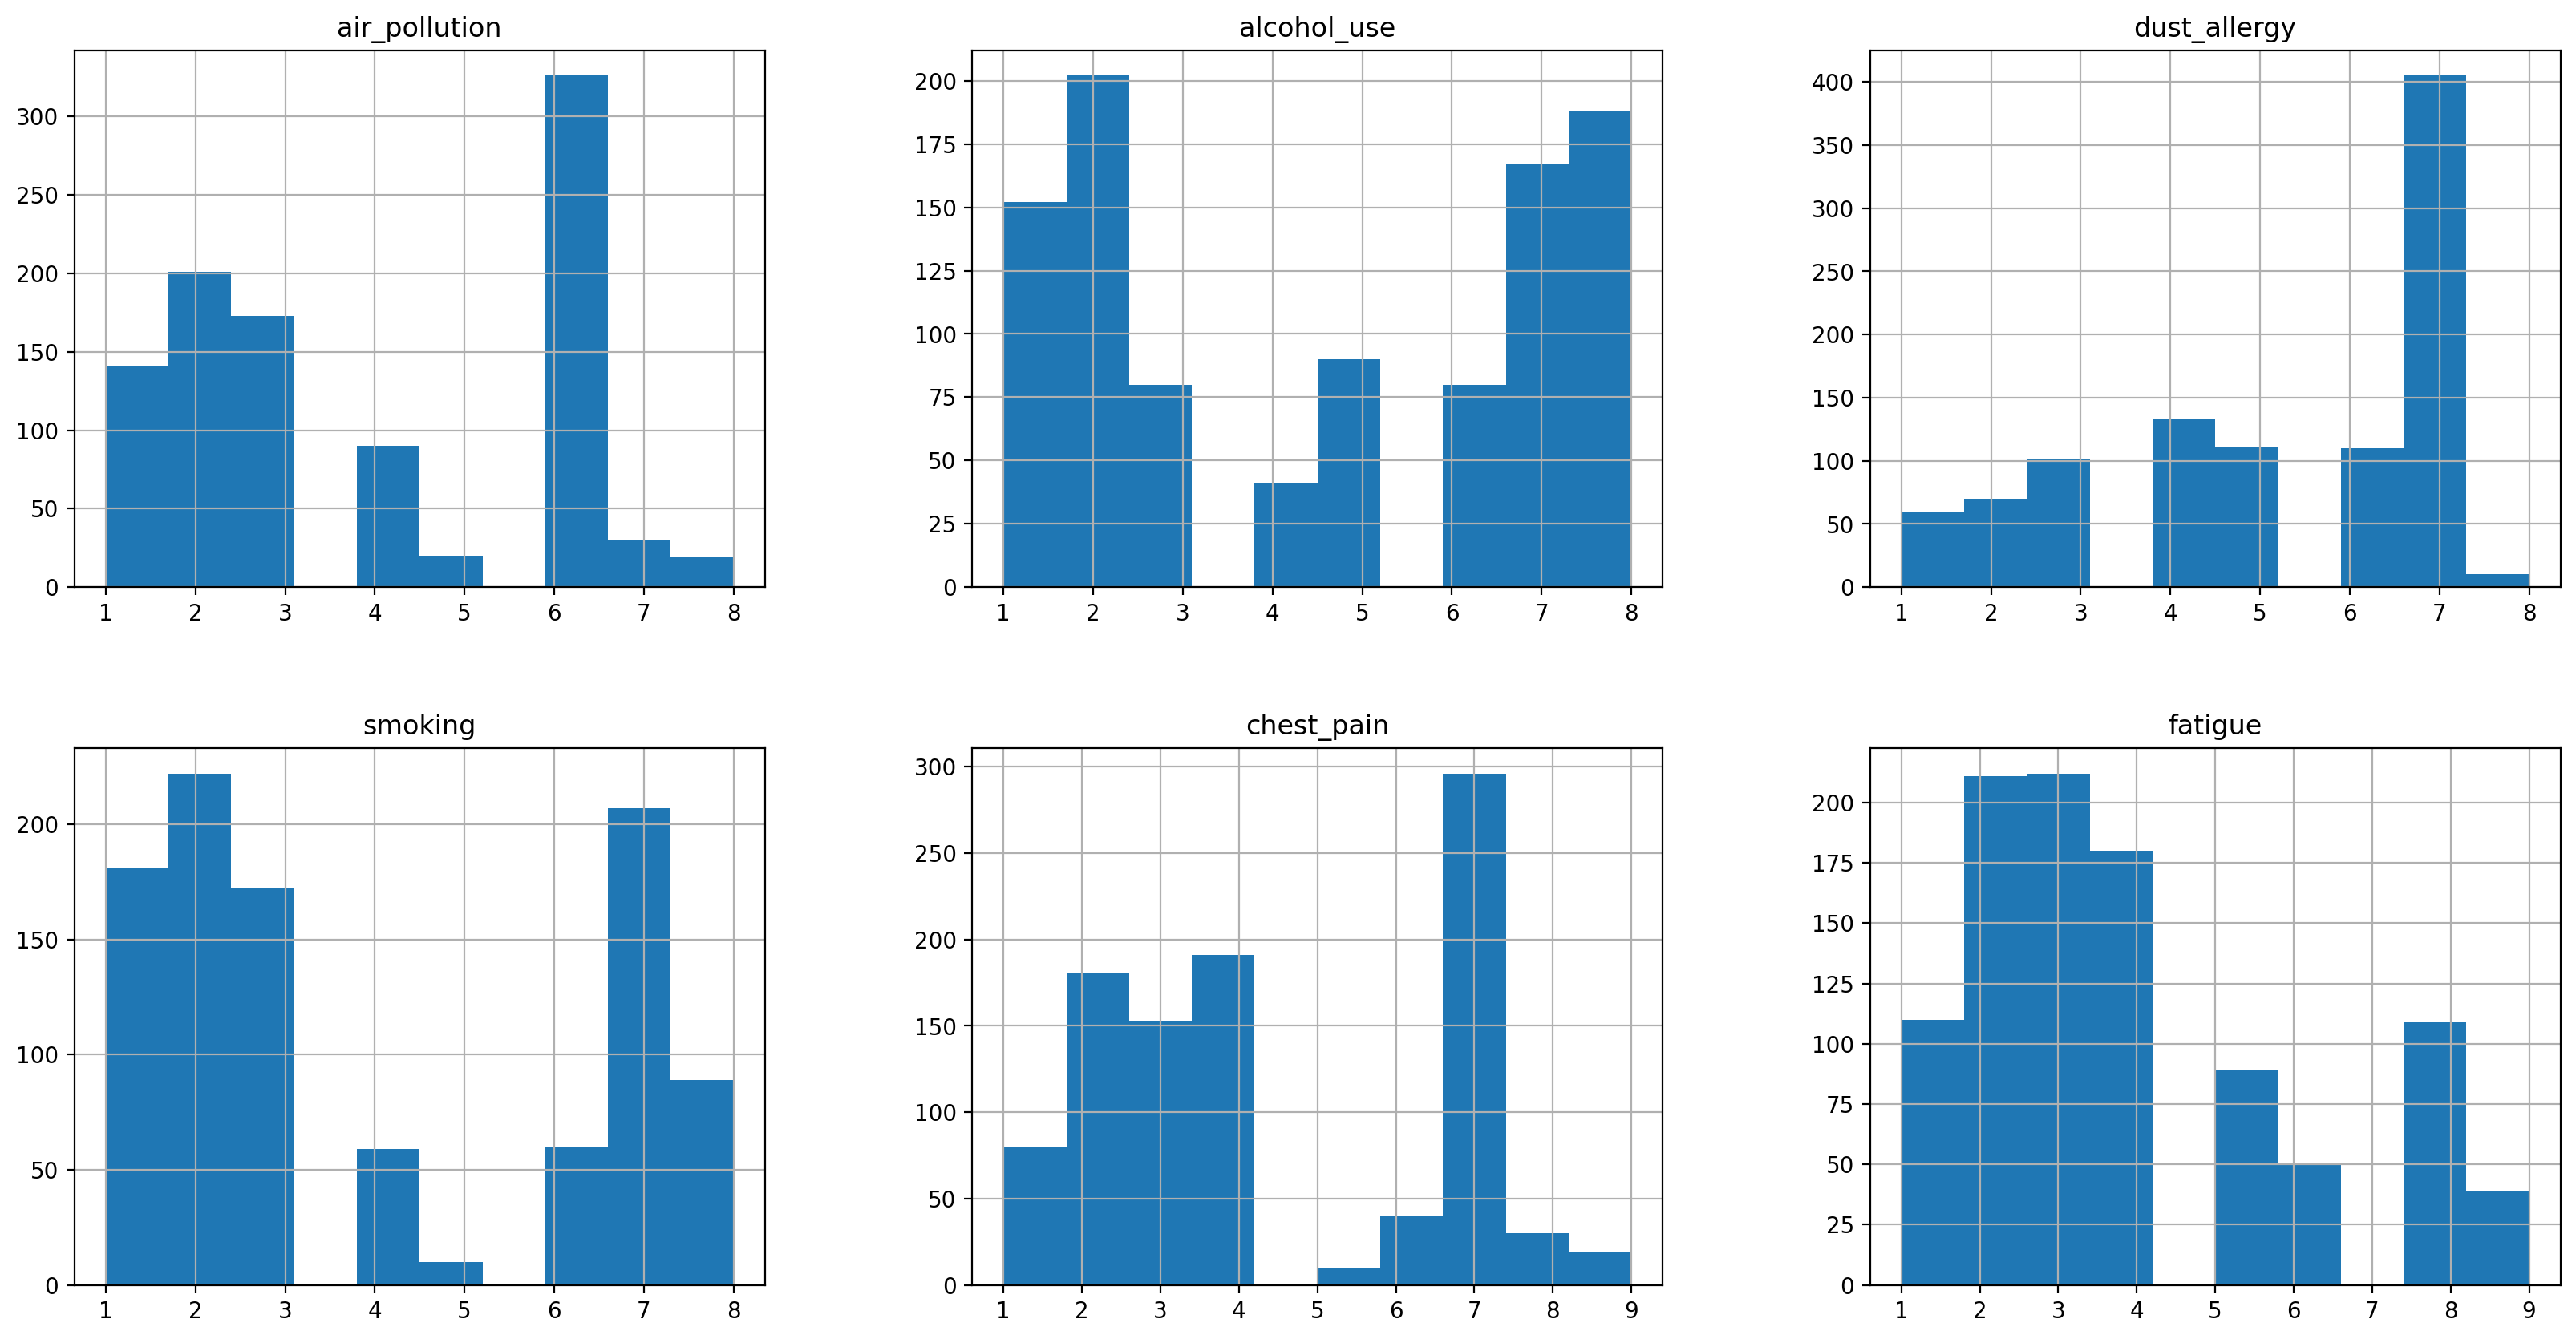

In [ ]:
# Histograms

print('\n')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')


	Smoking and Label of Lung Cancer


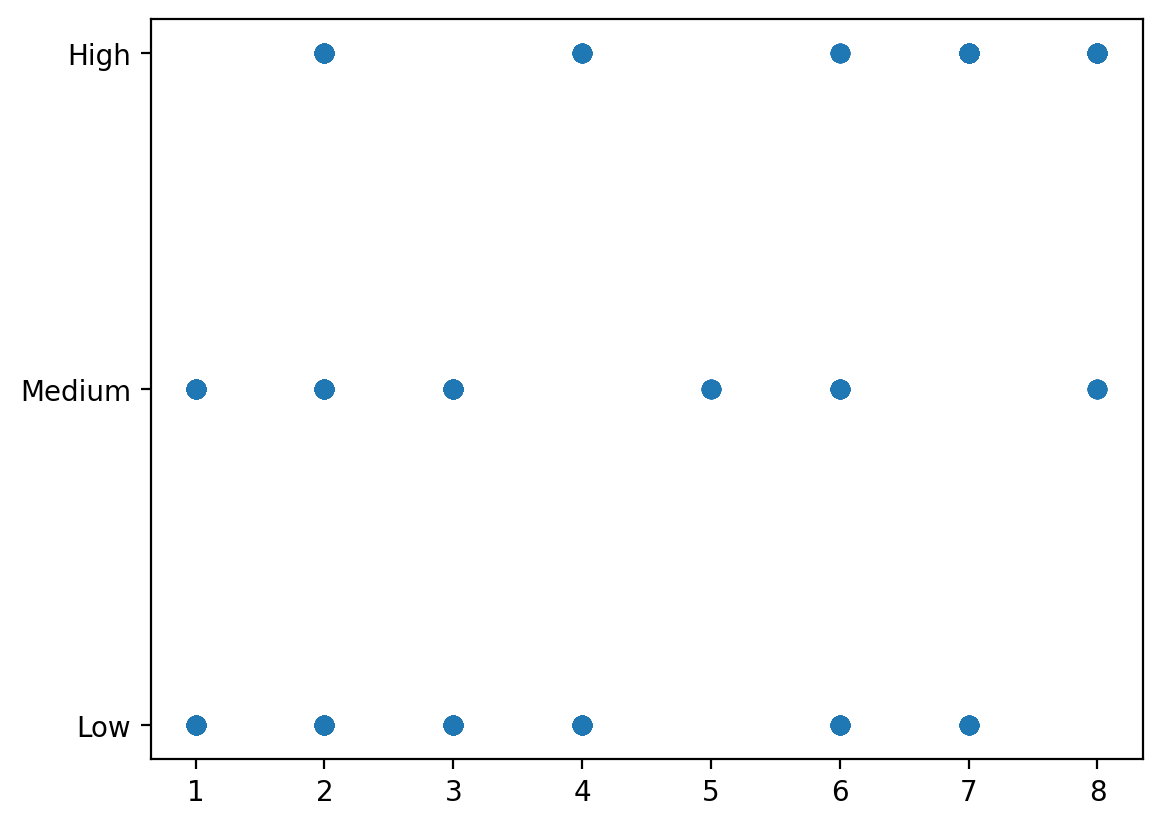




	Air Polution and Label of Lung Cancer


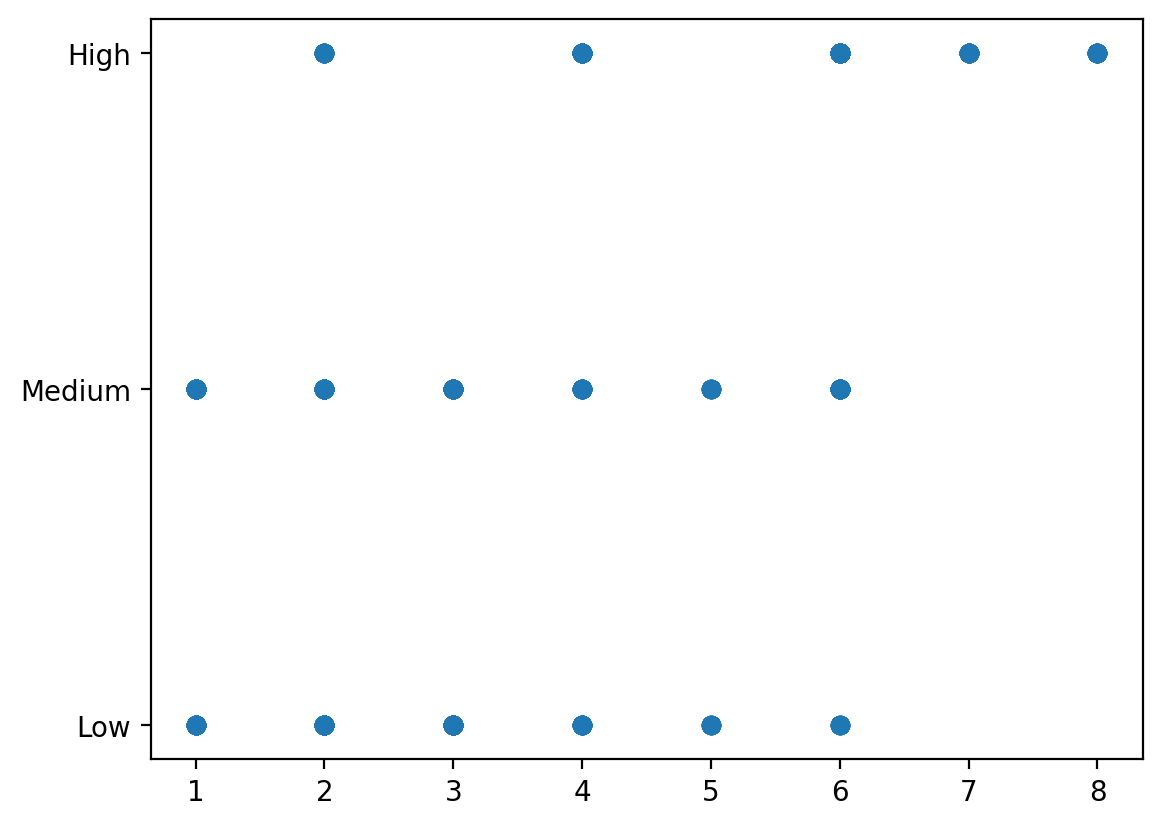

In [ ]:
# Scatter Plot

print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['smoking'], df['level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['air_pollution'], df['level'])
plt.show()
print('\n')

In [ ]:
# Animated Scatter Plot

px.scatter(data_frame=df,
          x='age',
           y='smoking',
           size='air_pollution',
           color='level',
           title='Age, Smoking and Air Polution',
           labels={
               'age': 'Age',
               'air_pollution': 'Air Polution',
               'level': 'Lung Cancer Level',
               'smoking': 'Smoking',
               'gender': 'Gender'
           },
           log_x=True,
           range_y=[-5,15],
           hover_name='level',
           animation_frame='gender',
           height=800,
           size_max=100
          )

In [ ]:
# dropping the level and index
df1 = df.drop(["level","index"],axis=1)

<Axes: >

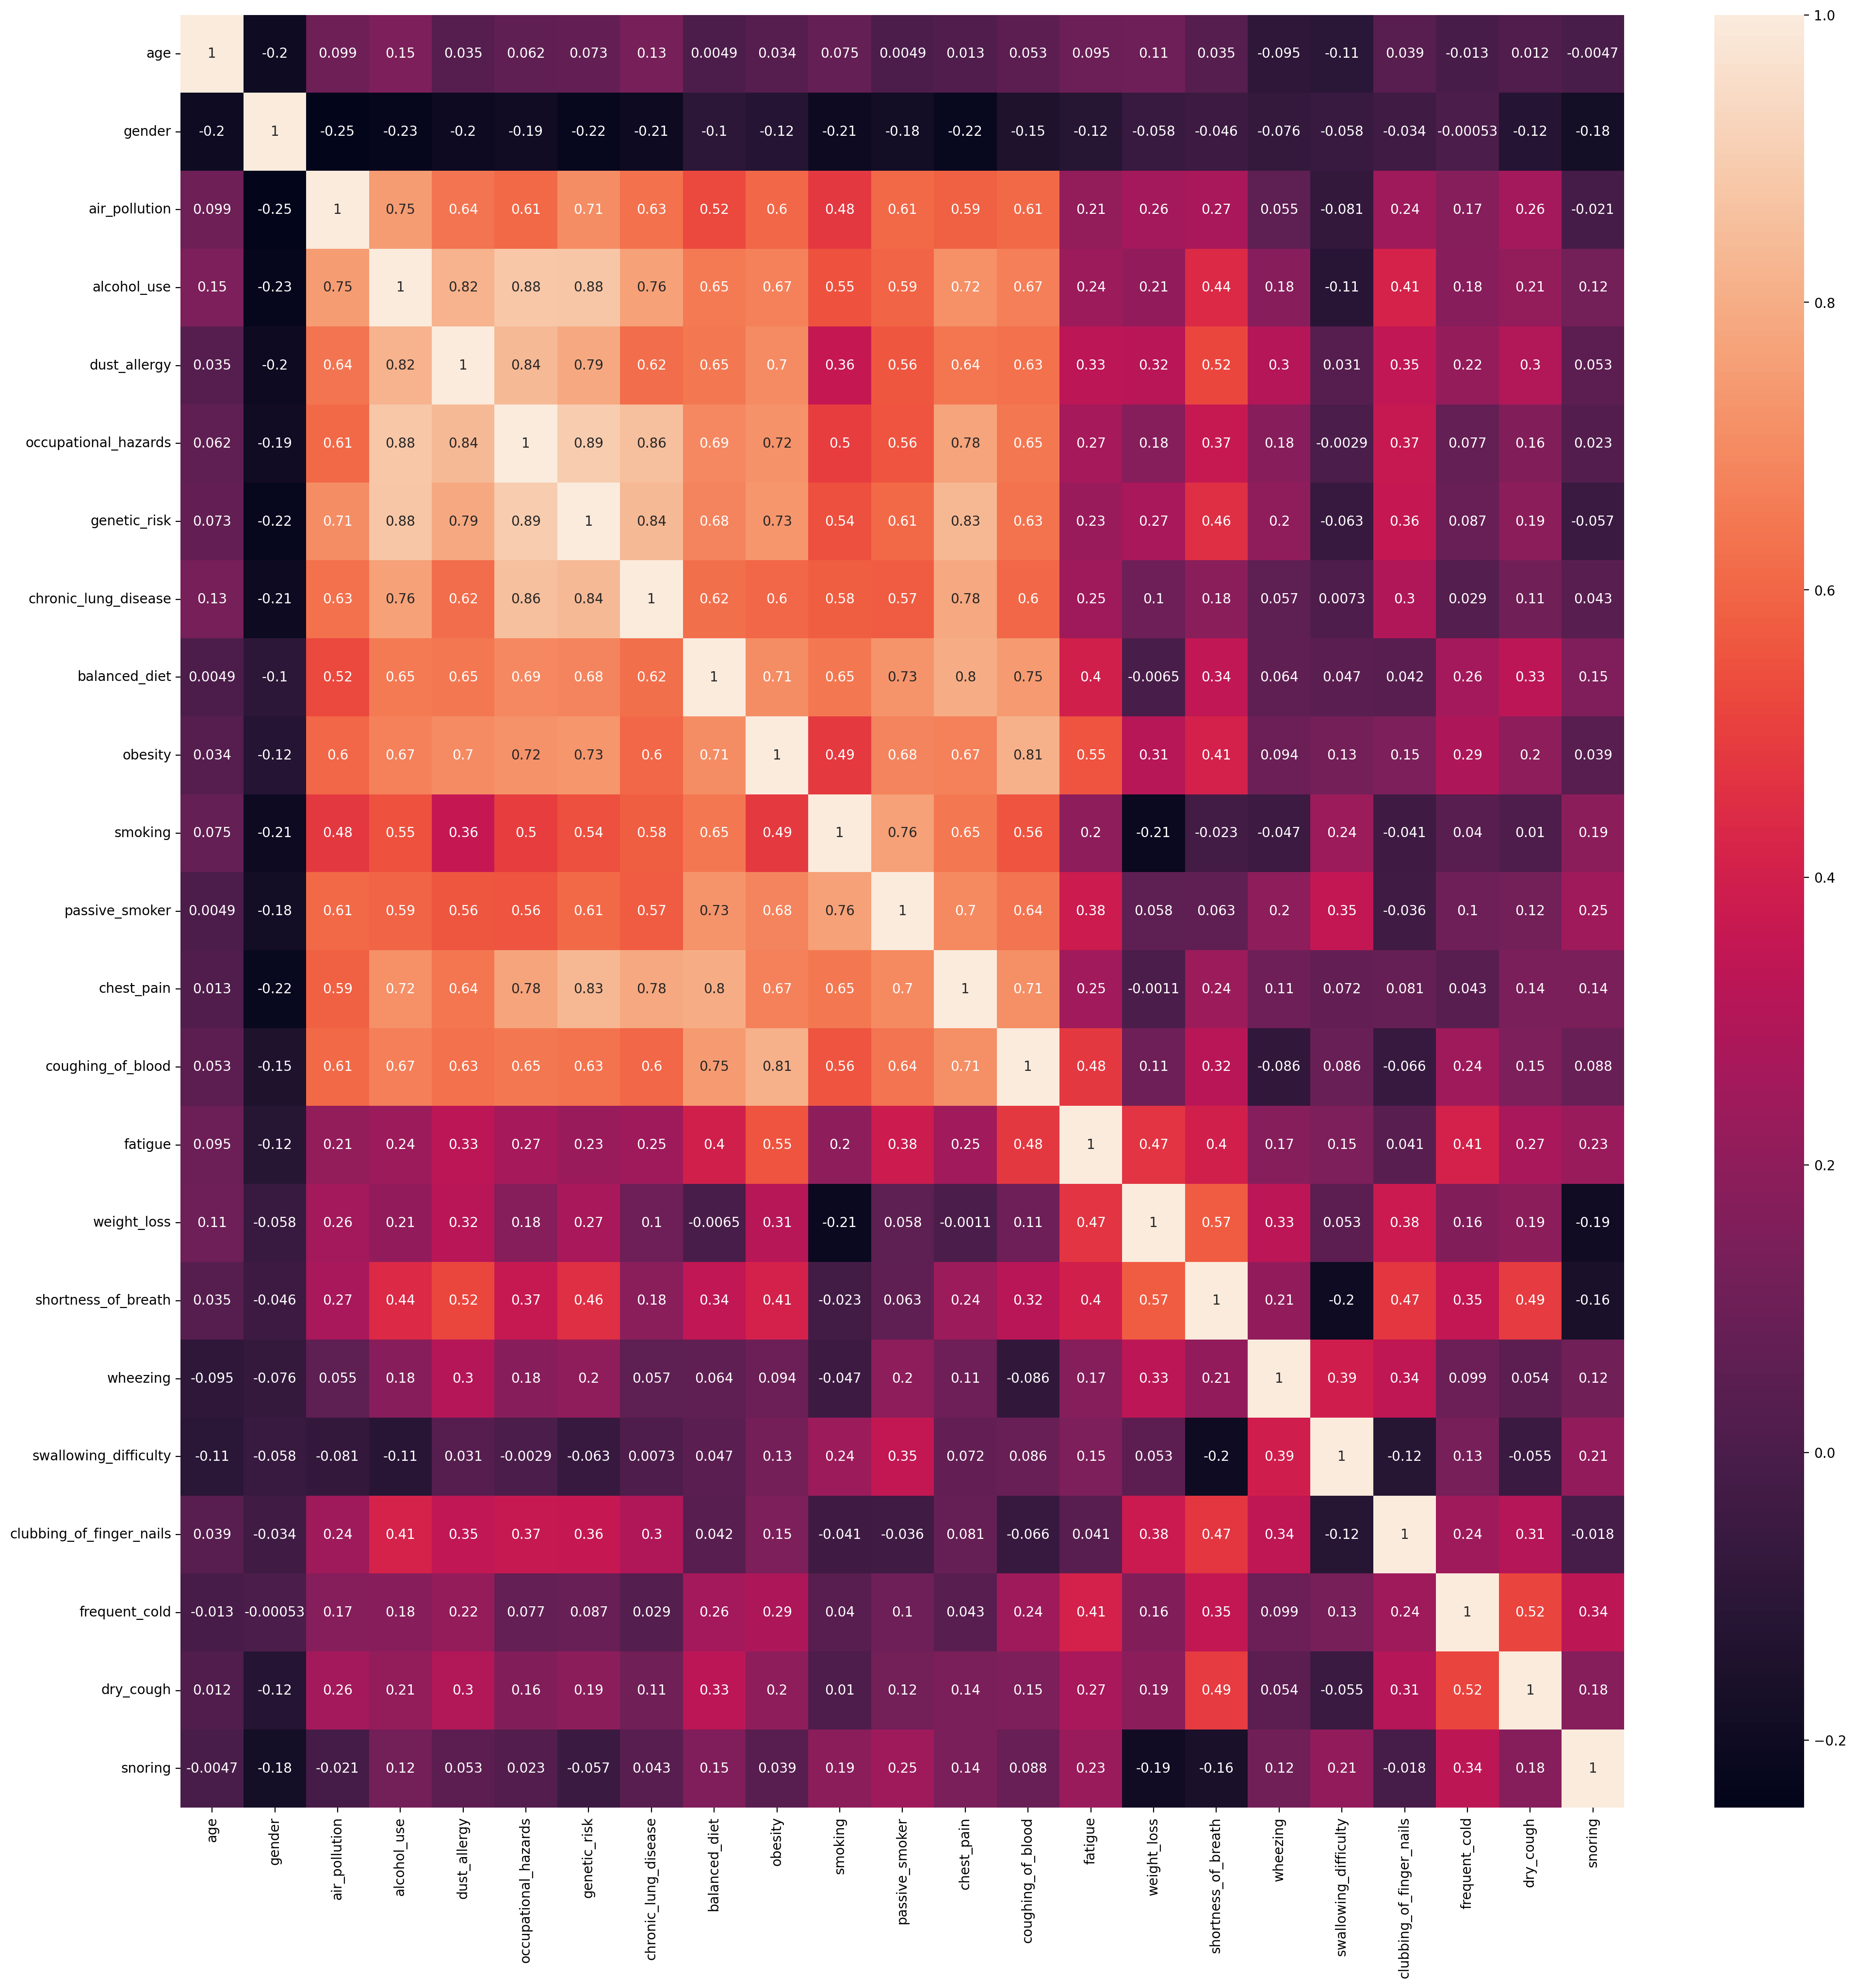

In [ ]:
#Heatmap plot of correlated features
plt.subplots(figsize = (24, 24))
sns.heatmap(df1.corr(), annot = True)

It shows us that obesity, air pollution, balanced diet, cough of blood, passive smoker is strong correlated with lung cancer, therefore we should be alert when these factors occur to us.

In [ ]:
correlationC=[]
for column in df1.columns :
    for columnC in df1.columns:
        a = df1[column].corr(df1[columnC])
        if a > 0.8 and (column != columnC) :
            if a in correlationC:
                continue
            else :
                correlationC.append(a)         
                print (column +" column has high correlation with column "+ columnC)
                print(df1[column].corr(df1[columnC]))
                print("*******************************")

alcohol_use column has high correlation with column dust_allergy
0.8186435195099228
*******************************
alcohol_use column has high correlation with column occupational_hazards
0.8787859206801713
*******************************
alcohol_use column has high correlation with column genetic_risk
0.8772098877053743
*******************************
dust_allergy column has high correlation with column alcohol_use
0.8186435195099229
*******************************
dust_allergy column has high correlation with column occupational_hazards
0.835859771456722
*******************************
occupational_hazards column has high correlation with column genetic_risk
0.8930485226784656
*******************************
occupational_hazards column has high correlation with column chronic_lung_disease
0.8582838533909174
*******************************
genetic_risk column has high correlation with column occupational_hazards
0.8930485226784657
*******************************
genetic_risk column h

In [ ]:
correlationC.sort()
correlationC.reverse()
correlationC

[0.8930485226784657,
 0.8930485226784656,
 0.8787859206801713,
 0.8772098877053743,
 0.8582838533909174,
 0.836230827381165,
 0.8362308273811649,
 0.835859771456722,
 0.8317508263736837,
 0.8186435195099229,
 0.8186435195099228,
 0.8148047650547855]

In [ ]:
# the discrete column (Level) from the dataset needs to be repaired
df["gender"] = df["gender"].replace([1,2],["Female","Male"])
df["air_pollution"] = df["air_pollution"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["dust_allergy"] = df["dust_allergy"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["occupational_hazards"] = df["occupational_hazards"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["genetic_risk"] = df["genetic_risk"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["chronic_lung_disease"] = df["chronic_lung_disease"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["fatigue"] = df["fatigue"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["weight_loss"] = df["weight_loss"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["shortness_of_breath"] = df["shortness_of_breath"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["wheezing"] = df["wheezing"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["swallowing_difficulty"] = df["swallowing_difficulty"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
df["clubbing_of_finger_nails"] = df["clubbing_of_finger_nails"].replace([1,2,3,4,5,6,7,8,9],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]])
df["frequent_cold"] = df["frequent_cold"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["dry_cough"] = df["dry_cough"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["snoring"] = df["snoring"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["obesity"] = df["obesity"].replace([1,2,3,4,5,6,7],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7]])
df["passive_smoker"] = df["passive_smoker"].replace([1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])

In [ ]:
df["passive_smoker"].value_counts()

low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: passive_smoker, dtype: int64

In [ ]:
df.level.value_counts()

High      365
Medium    332
Low       303
Name: level, dtype: int64

<Axes: title={'center': 'Level Column Values'}, ylabel='level'>

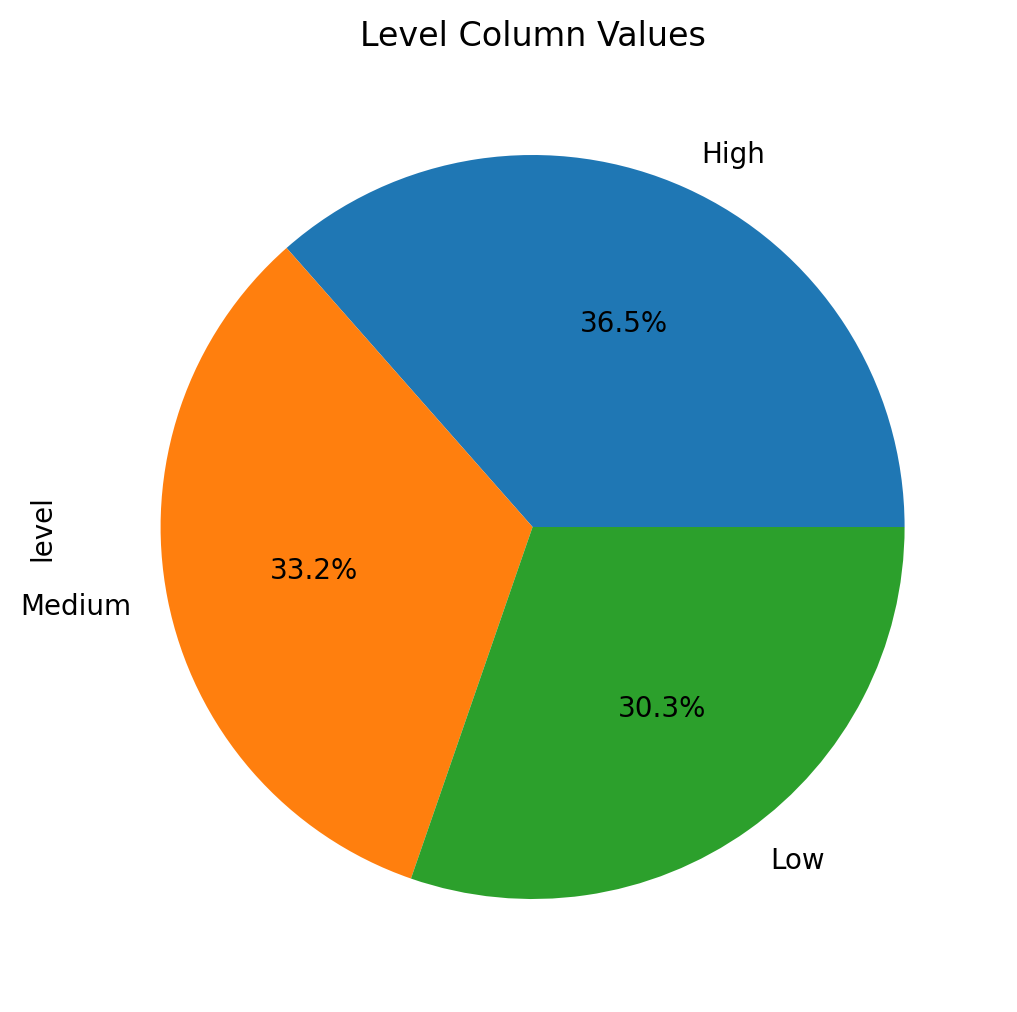

In [ ]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["level"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

## Question
How does Genetic risk affect Occupational Hazards?

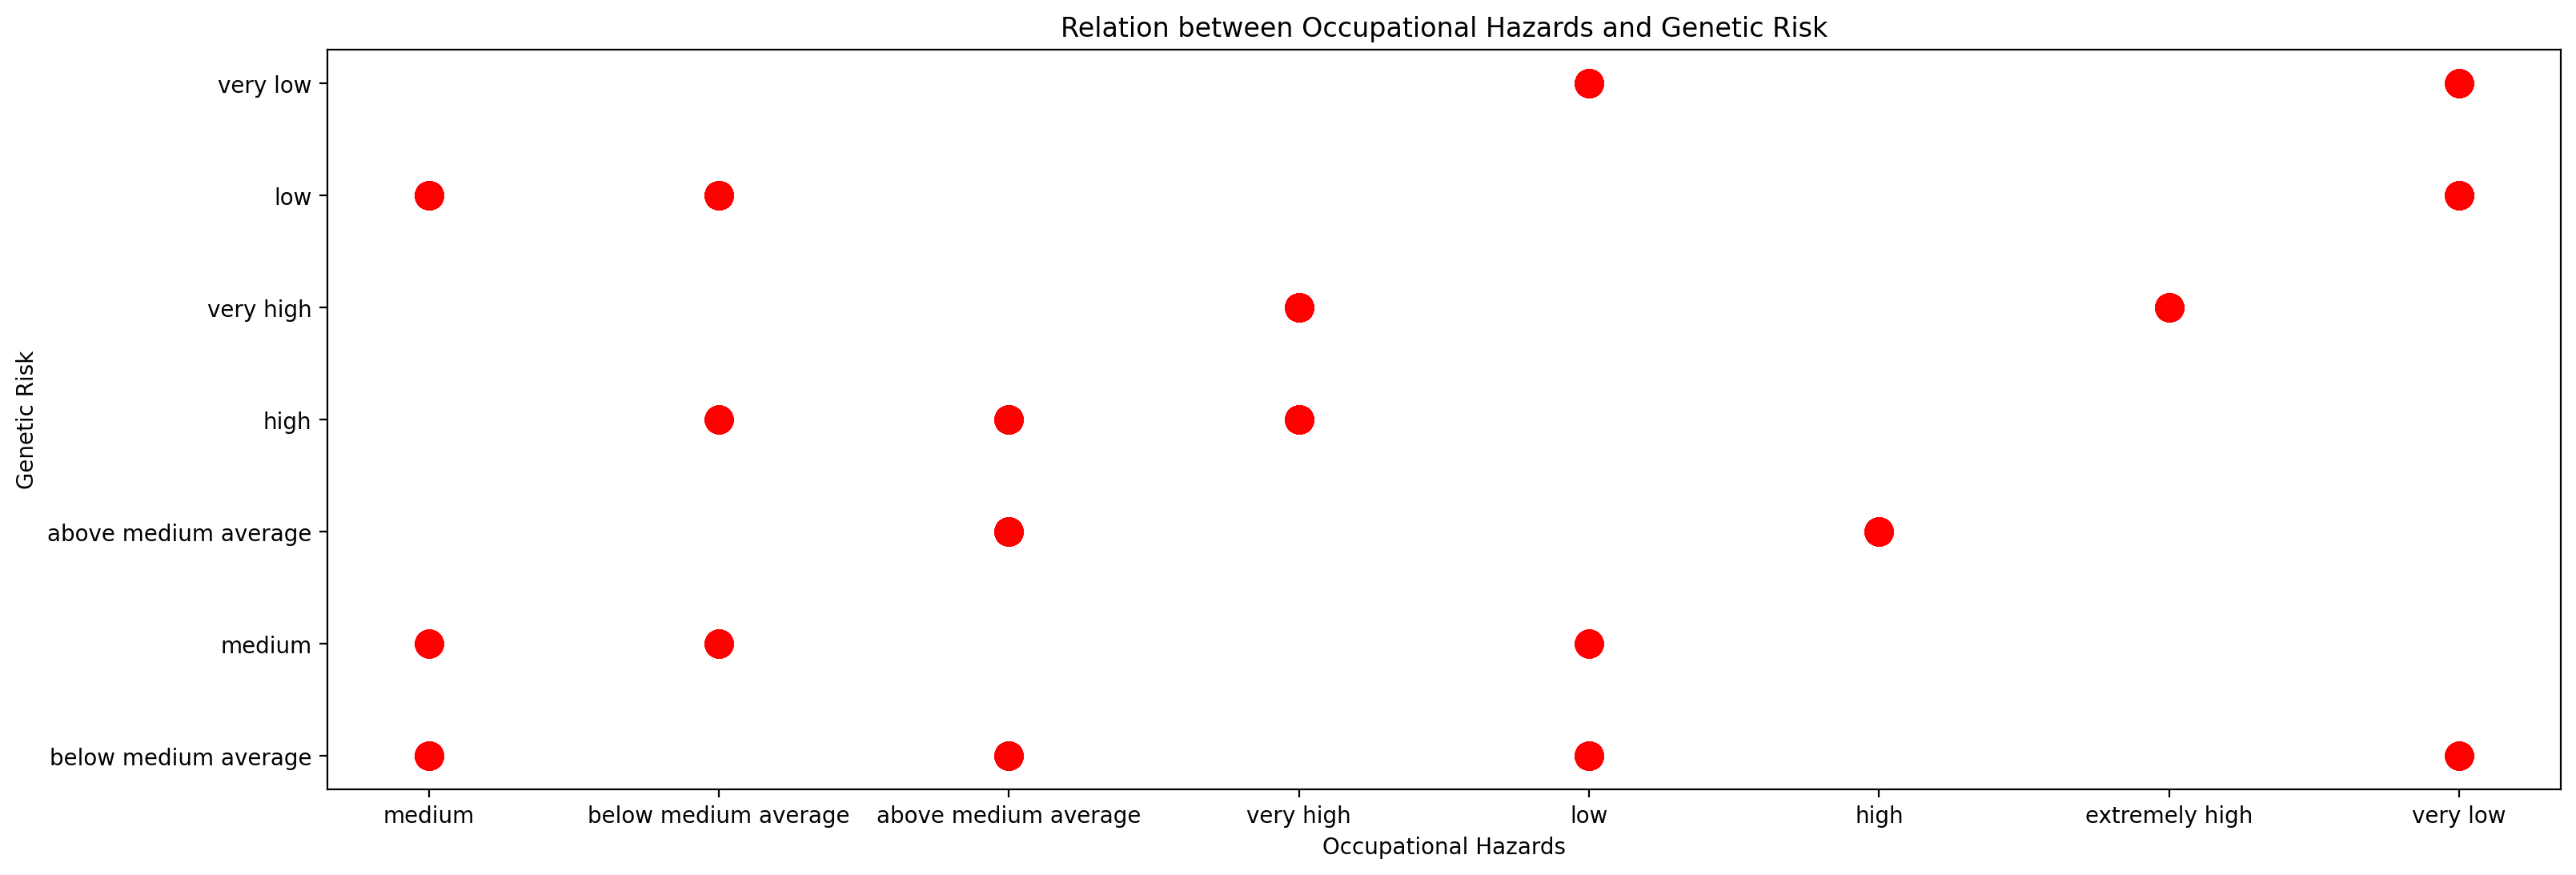

In [ ]:
f = plt.figure(figsize=(18, 6))
plt.xlabel("Occupational Hazards")
plt.ylabel("Genetic Risk")
plt.title("Relation between Occupational Hazards and Genetic Risk")
plt.scatter(df["occupational_hazards"],df["genetic_risk"],alpha=0.7,c="red",linewidths=7)

There's a postive correlation between them as people with high genetic risk are having high occupational hazards

[Text(0.5, 1.0, 'Relation Between OccuPational Hazards and Gender')]

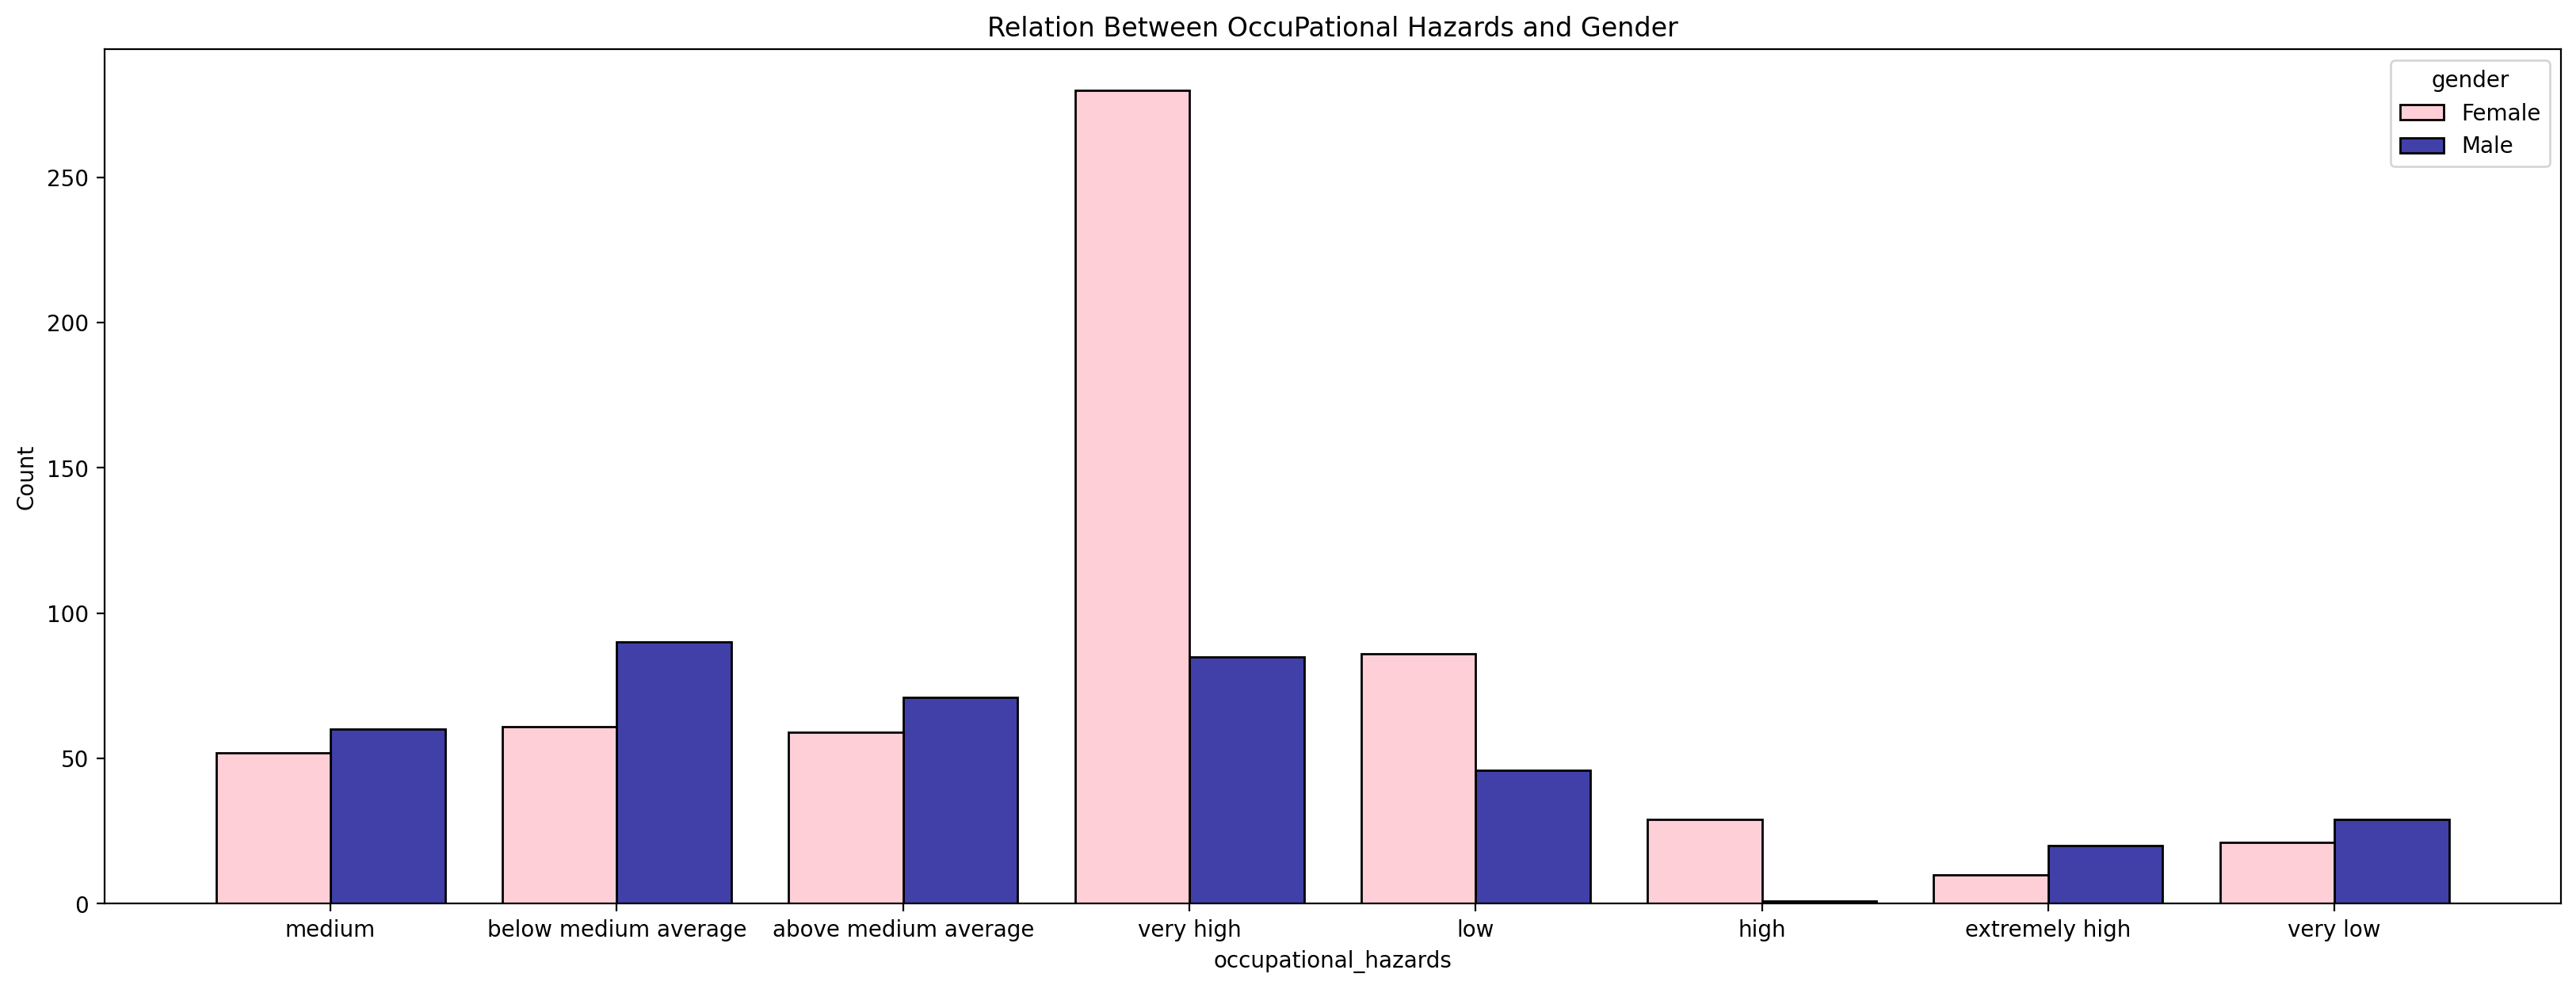

In [ ]:
# Who are more susceptible to disease ?

plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x=df["occupational_hazards"], hue=df["gender"], multiple="dodge", shrink=.8,palette=["pink","darkblue"]).set(title='Relation Between OccuPational Hazards and Gender')

According to the graph above females are more likly to get lungs disease with high ratio compared to men

In [ ]:
df.gender.value_counts()

Female    598
Male      402
Name: gender, dtype: int64

<Axes: title={'center': 'Number of Passive Smokers'}, xlabel='passive_smoker', ylabel='Count'>

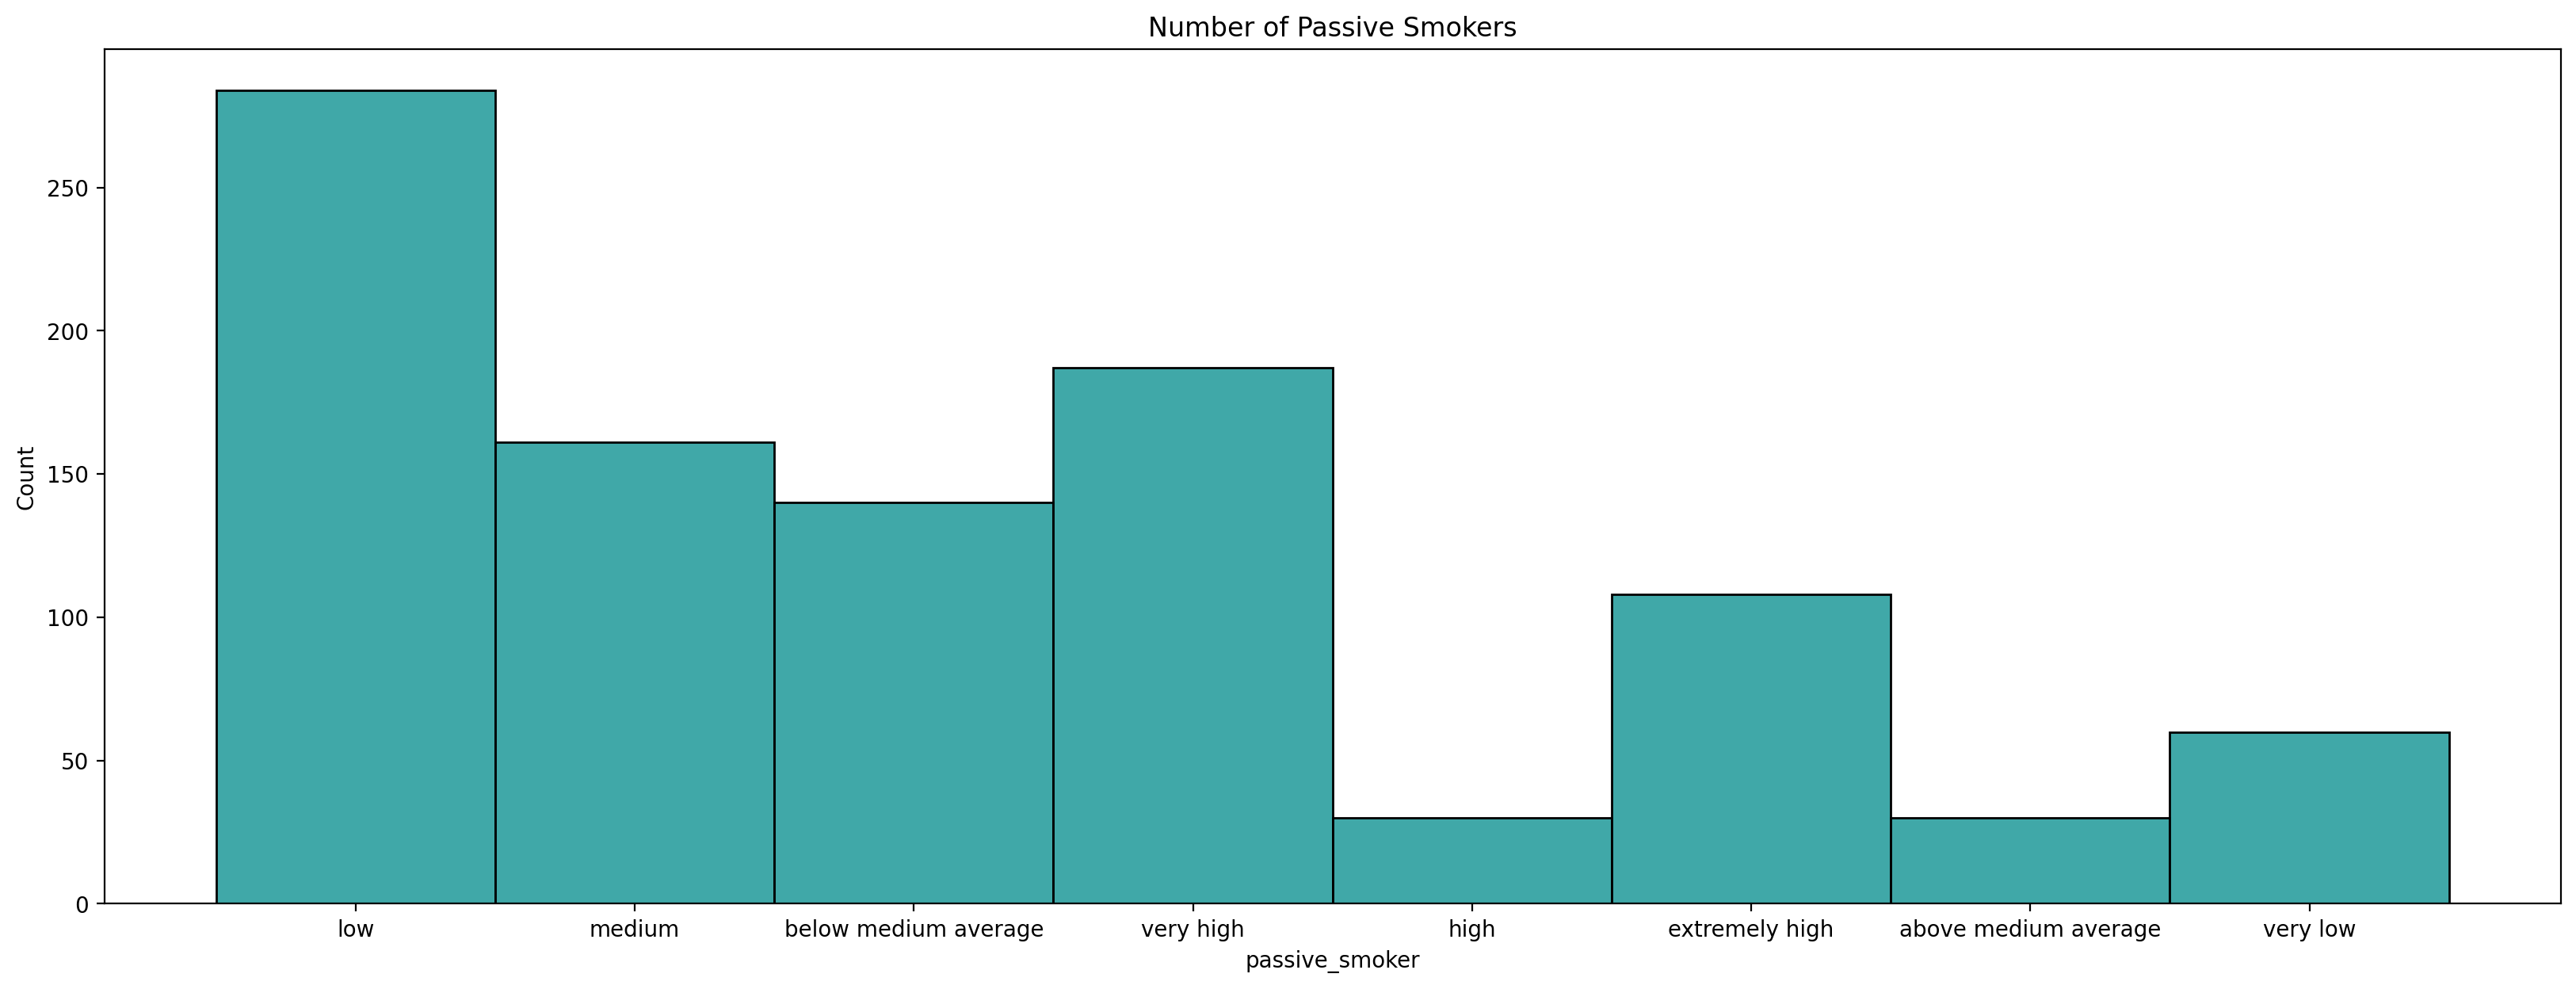

In [ ]:
# How Many Smoker We Have & How Much They Smoke ?

plt.subplots(figsize=(20, 7))
plt.title("Number of Passive Smokers")
sns.histplot(data=df, x=df["passive_smoker"],color= "darkcyan")

Most Passive Smokers are Smoking in low values nearly 300 Smokers

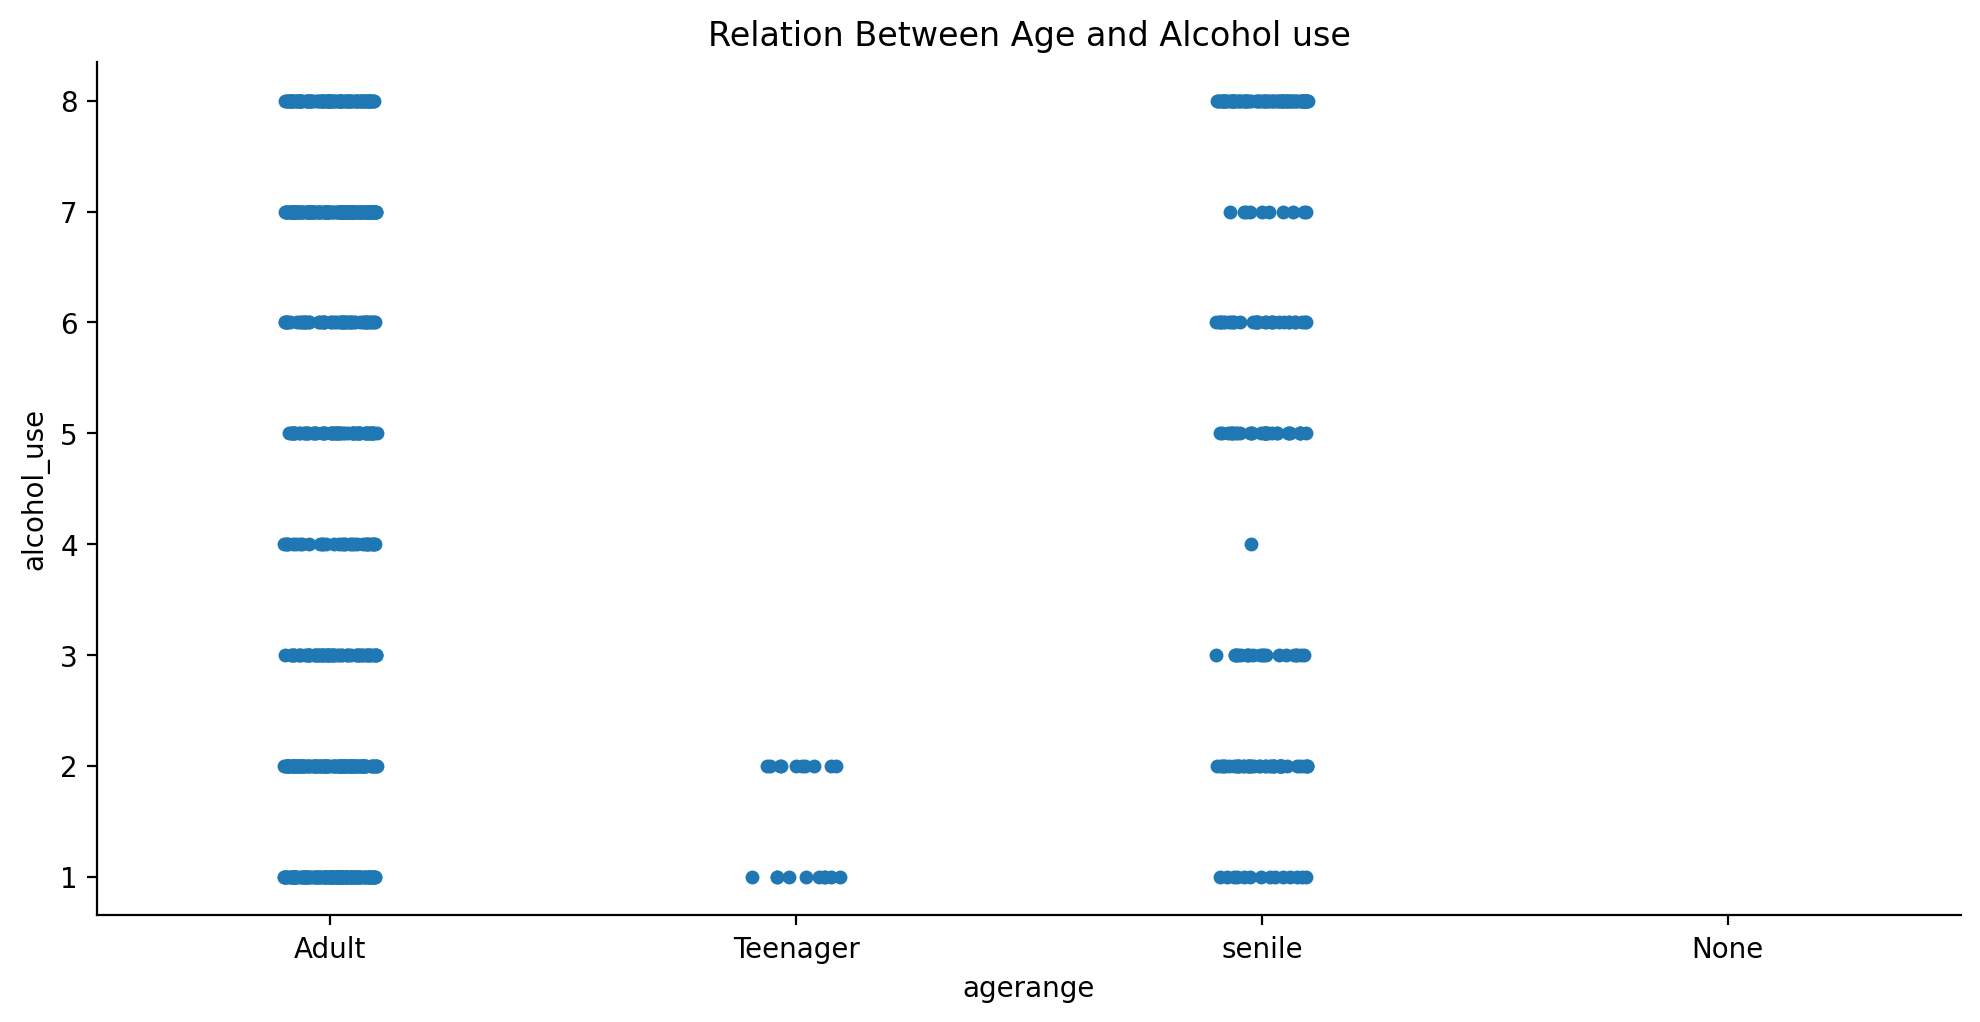

In [ ]:
# Who is drinking the most alcohols ?

df3= df.copy()

df3['agerange'] = None
df3.loc[(df3['age'] > 14) & (df3["age"] < 18), 'agerange'] = "Teenager"
df3.loc[(df3['age'] > 18) & (df3["age"] < 45), 'agerange'] = "Adult"
df3.loc[(df3['age'] > 45) & (df3["age"] < 74), 'agerange'] = "senile"


sns.catplot(data=df3, x="agerange", y="alcohol_use",aspect=20/10,height=5).set(title='Relation Between Age and Alcohol use')

According to the graph Adults are the most people to drink alcohols ( 18 < Adults < 45 )

<Axes: title={'center': 'Relation between Obesity and Coughing of Blood'}, xlabel='obesity', ylabel='coughing_of_blood'>

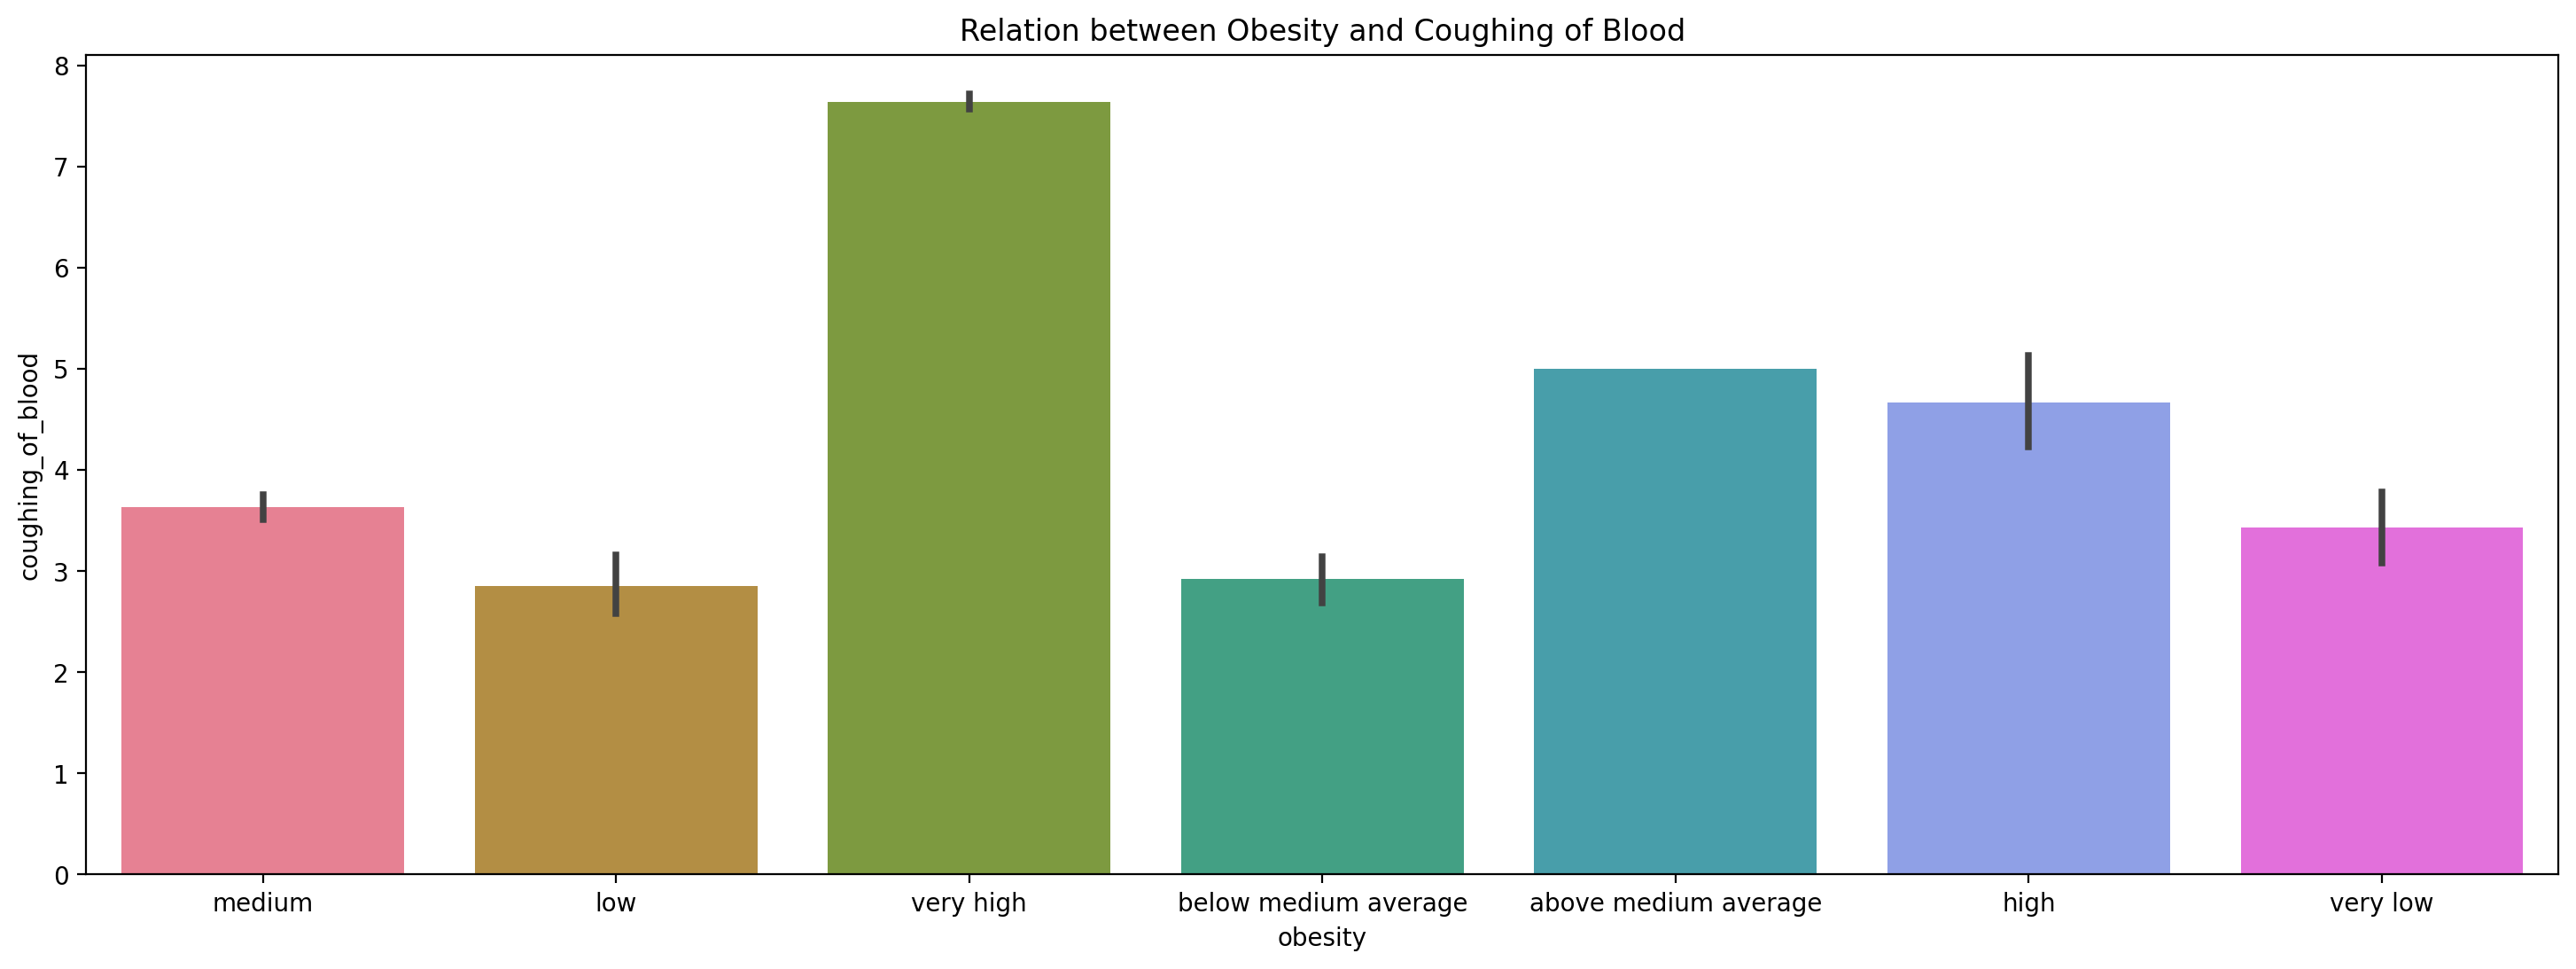

In [ ]:
# How is Obesity affecting Coughing of blood level ?

plt.figure(figsize=(18, 6))
plt.title("Relation between Obesity and Coughing of Blood")
sns.barplot(data=df, x="obesity", y="coughing_of_blood",palette="husl")

According to the graph, people with high obesity tends to have more coughing of blood

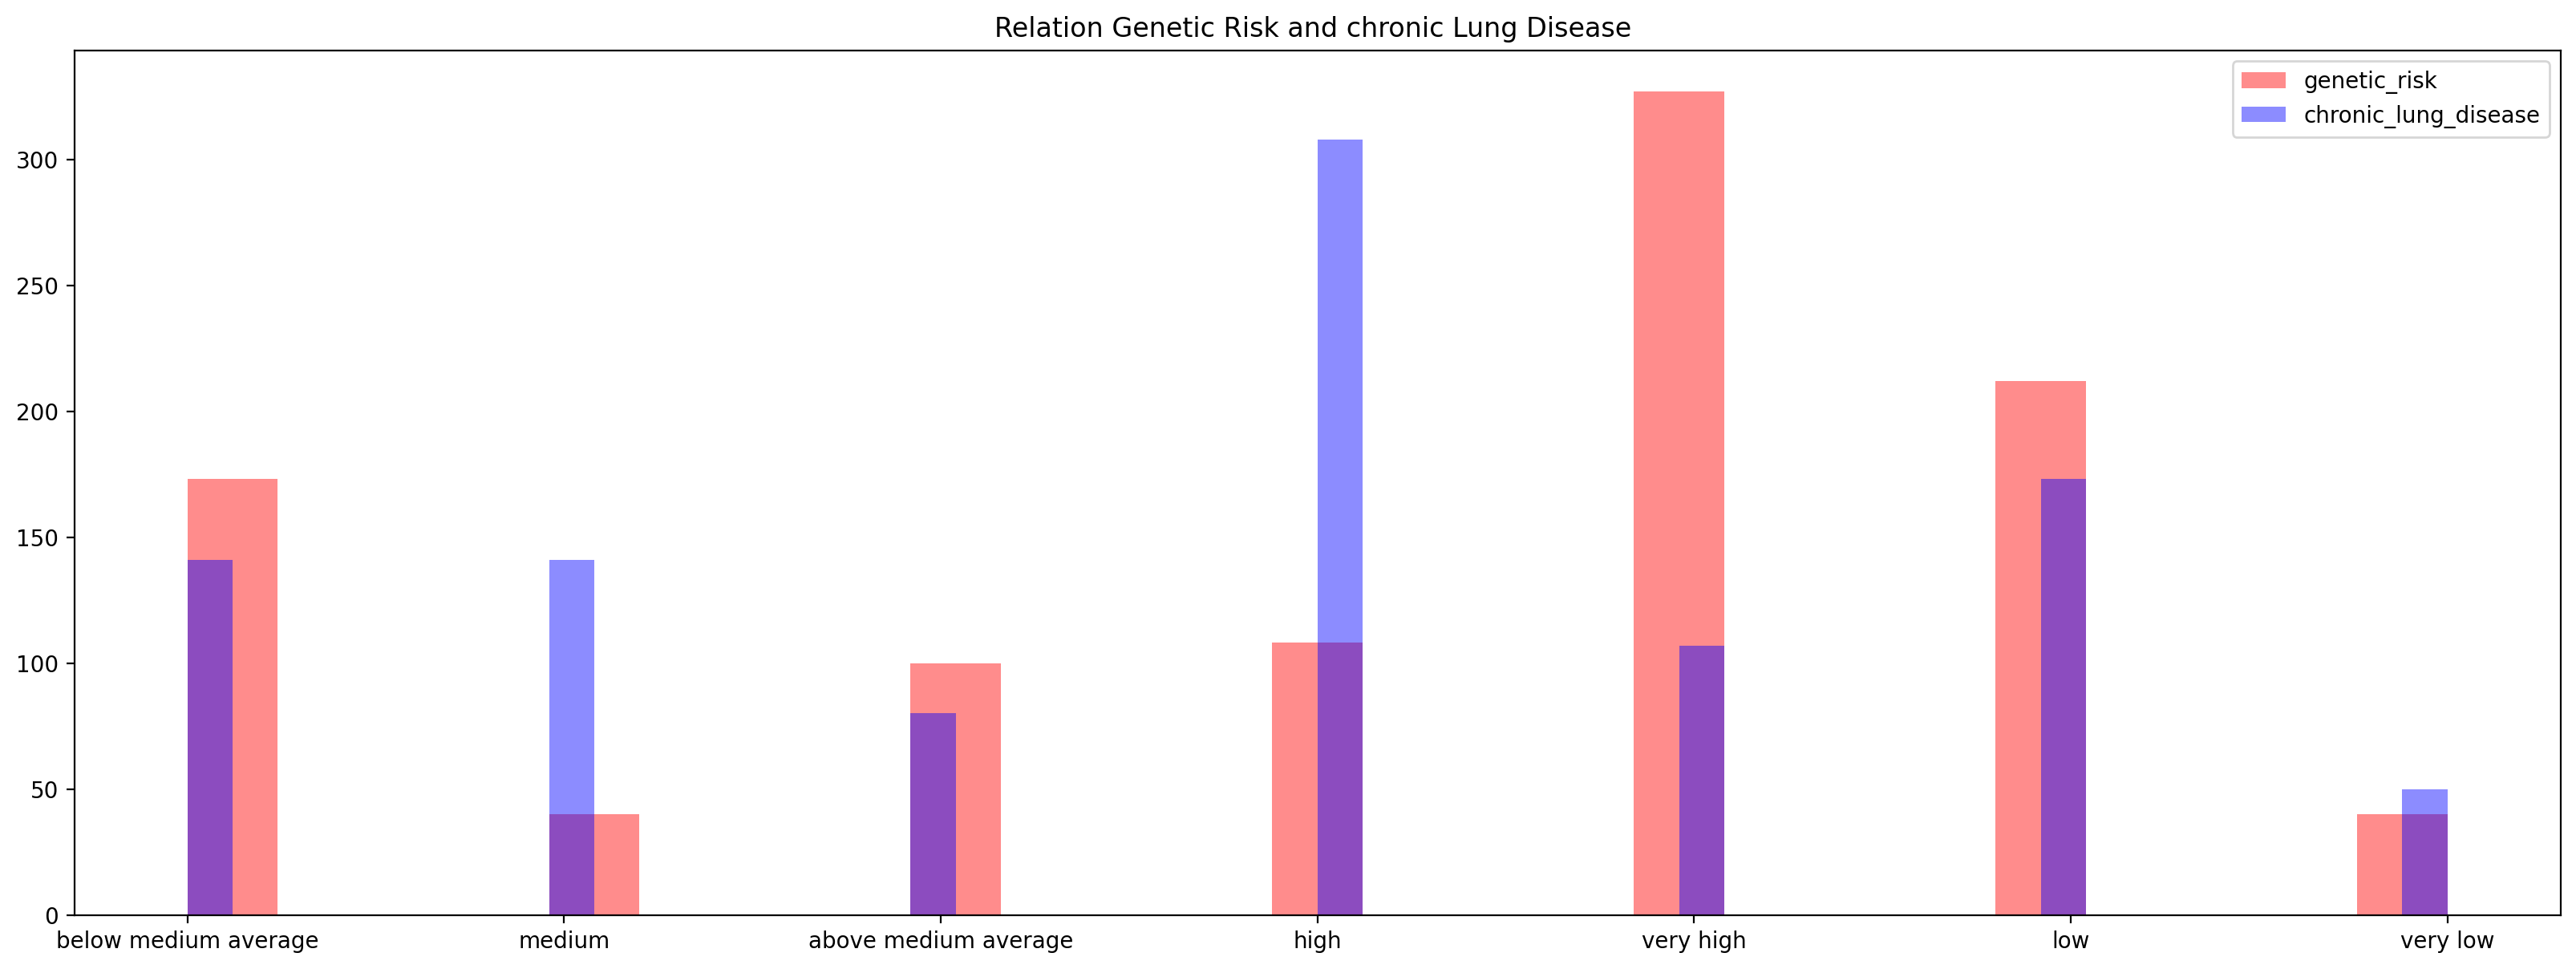

In [ ]:
# What is the Relation Genetic Risk and chronic Lung Disease ?

plt.subplots(figsize=(20, 7))

plt.hist(df['genetic_risk'], bins=25, alpha=0.45, color='red')
plt.hist(df['chronic_lung_disease'], bins=50, alpha=0.45, color='blue')

plt.title("Relation Genetic Risk and chronic Lung Disease ")

  
plt.legend(['genetic_risk', 
            'chronic_lung_disease'])

According to this graph, it seems like Genetic Risk has no effect on chronic Lung Disease

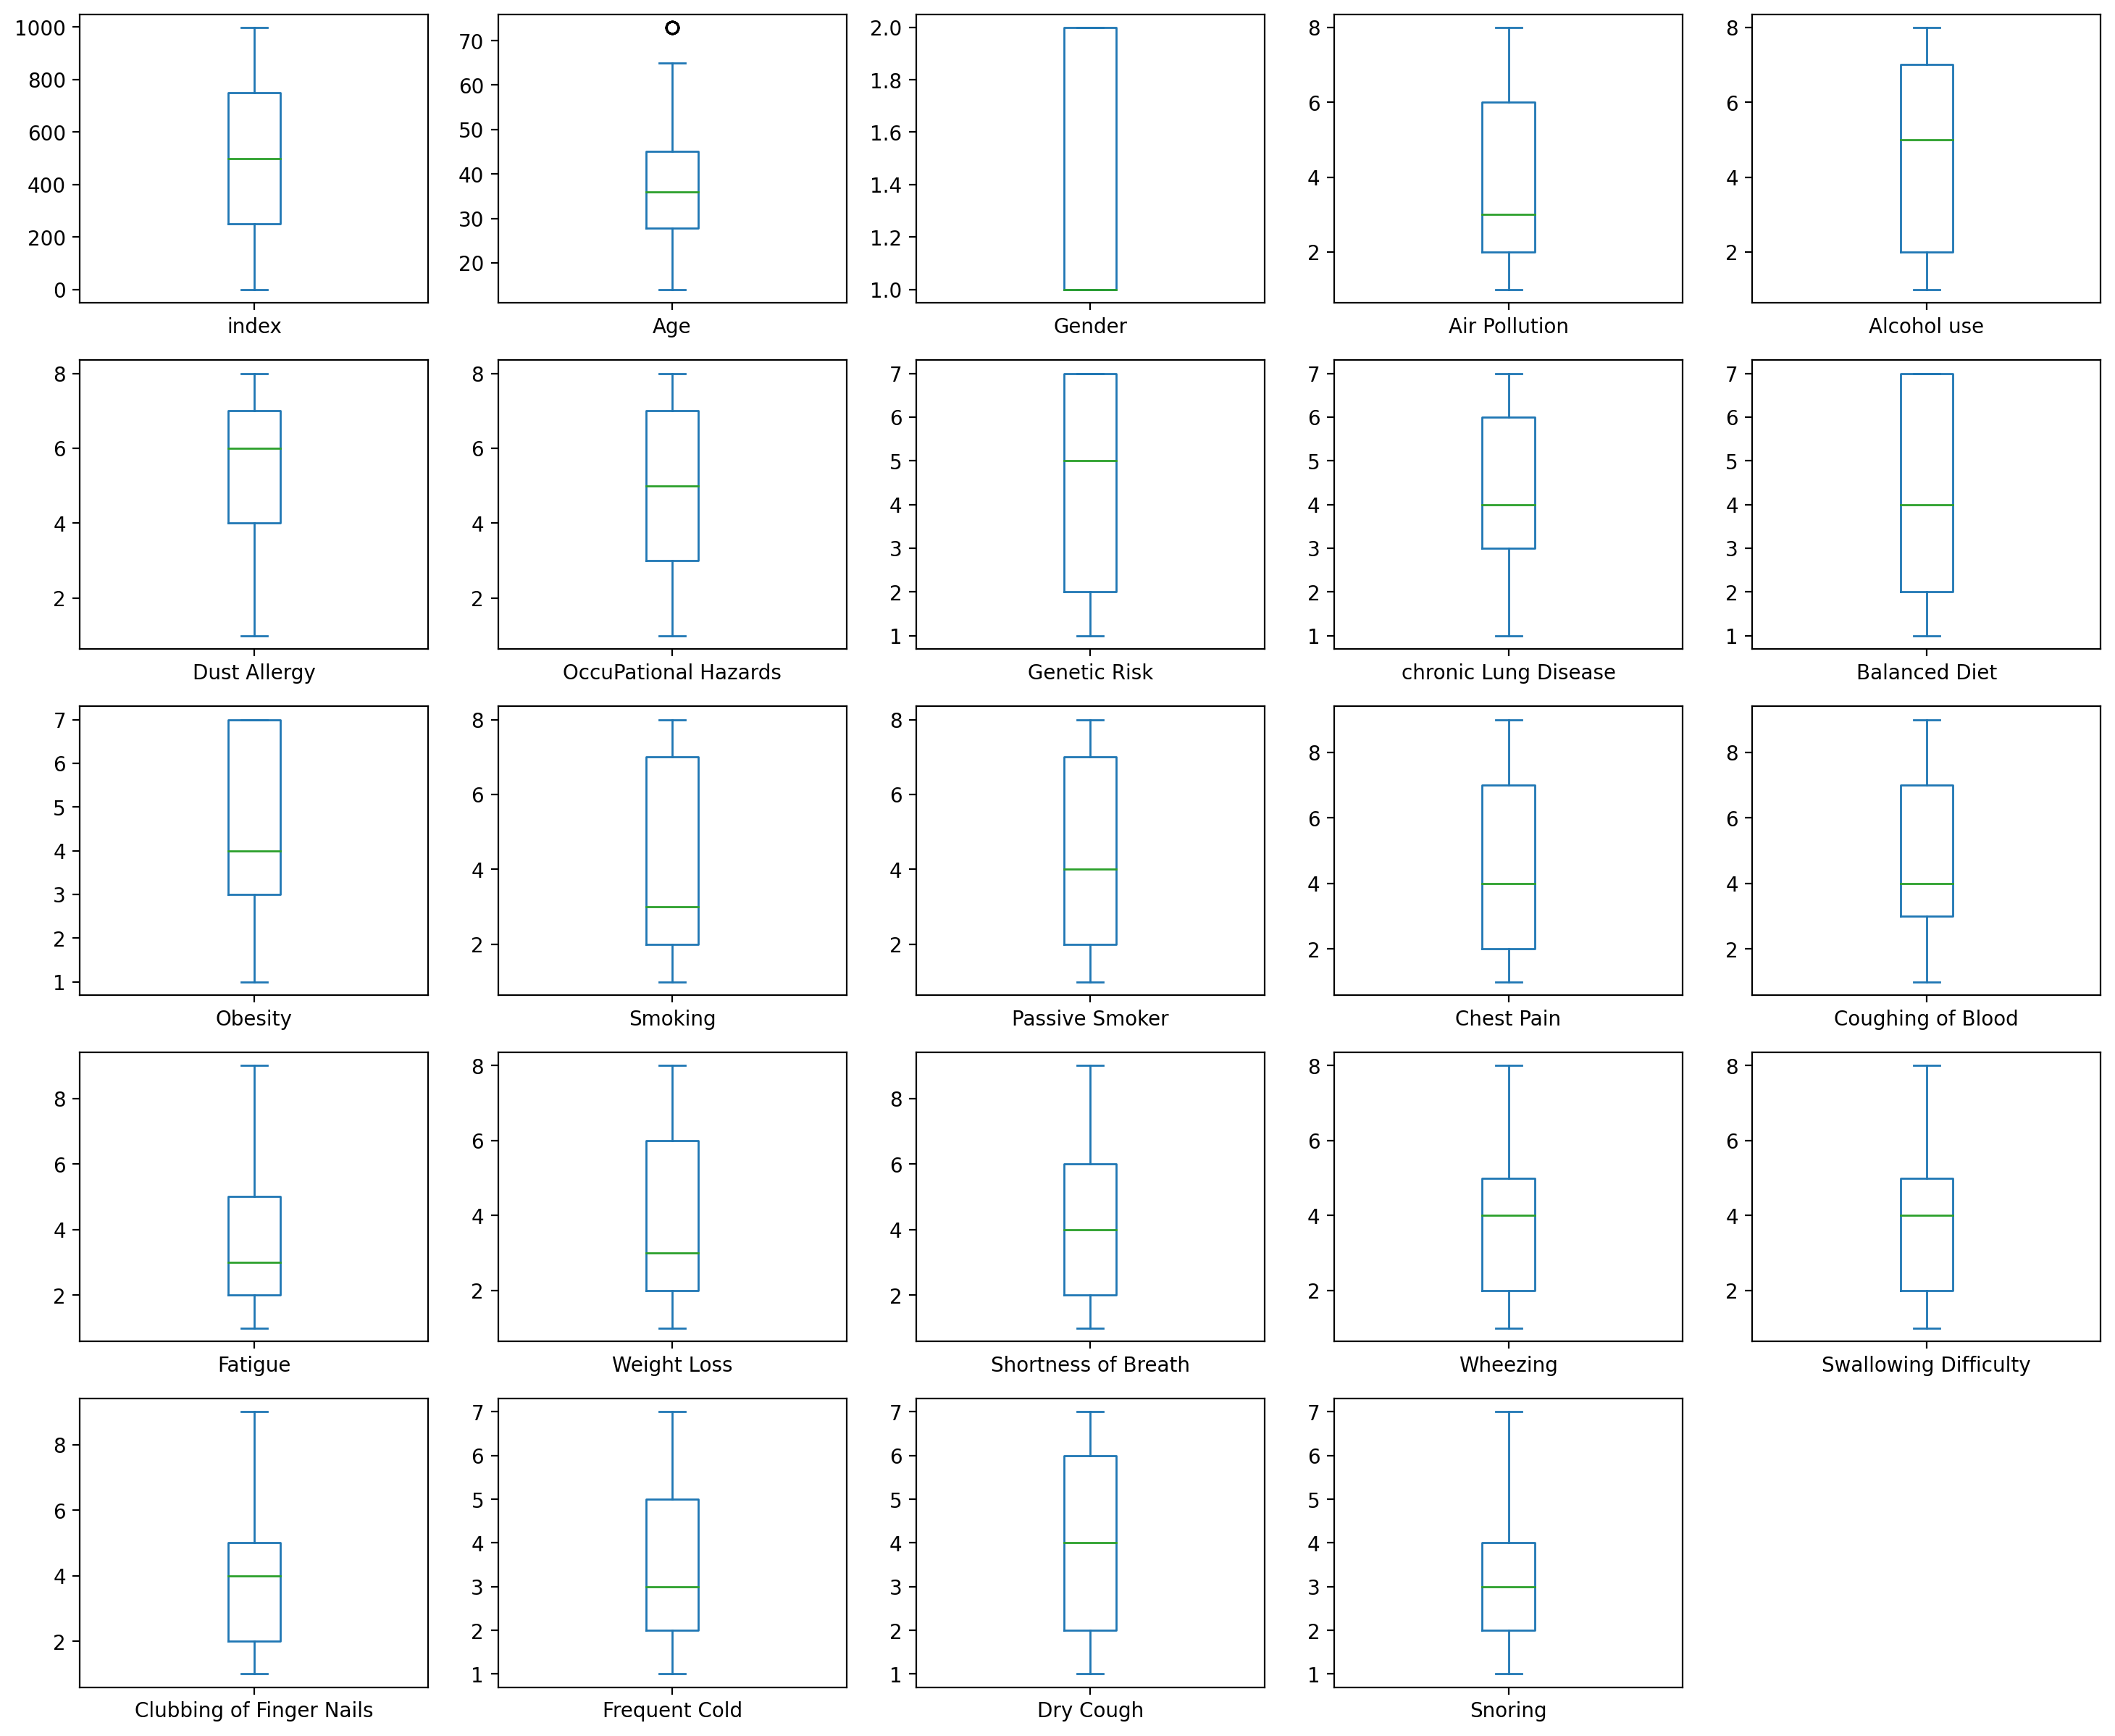

In [ ]:
# Are there any outliers in the dataset ?
df6 = pd.read_csv("/content/cancer-patient-datasets.csv")
df6.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

<Axes: title={'center': 'Age Column Box Plot'}>

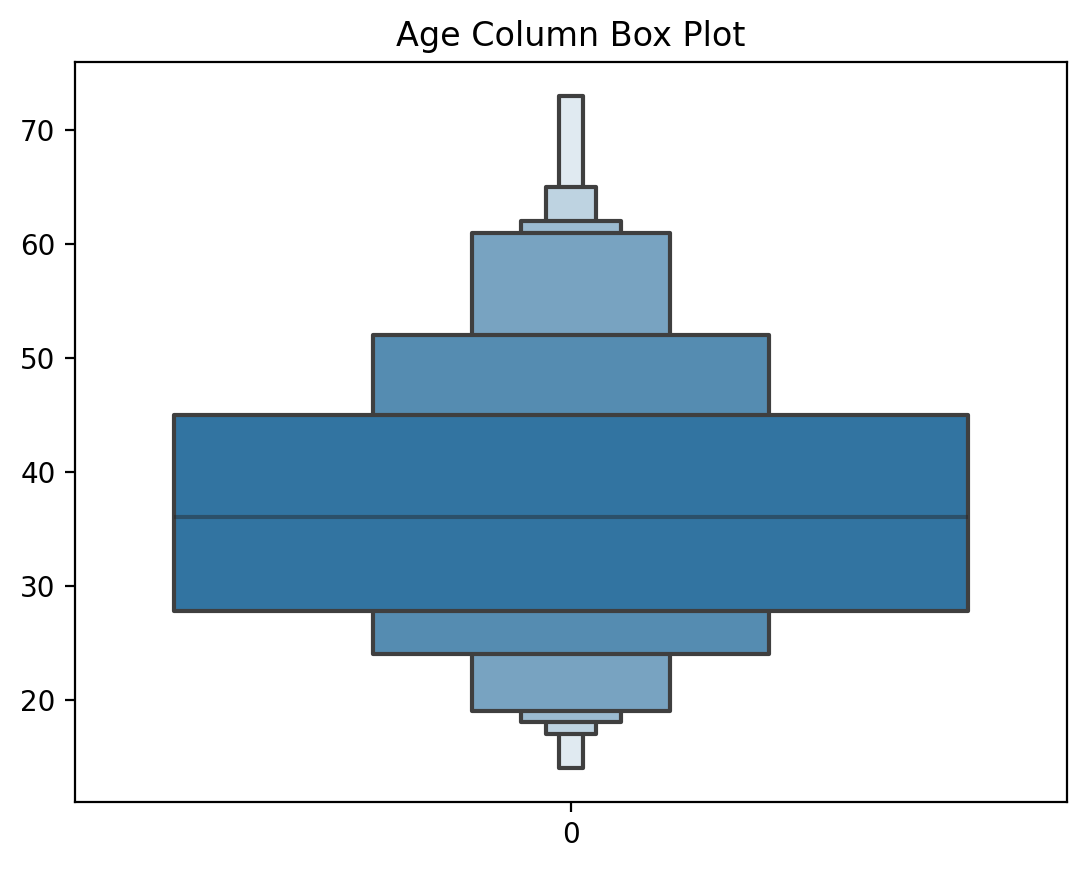

In [ ]:
plt.title("Age Column Box Plot")
sns.boxenplot(df.age)

There are no outliers found

## Encoding Data

In [ ]:
# making an object named le from LabelEncoder Class
le = LabelEncoder()

# transforming the datatype
df6['Level'] = le.fit_transform(df6['Level'])
df6['Patient Id'] = le.fit_transform(df6['Patient Id'])

In [ ]:
df6.dtypes

index                       int64
Patient Id                  int64
Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
Level                       int64
dtype: object

## Train Test Split

In [ ]:
# Split data between predictors and output variable
x = df6.drop(["Level","Patient Id","index"],axis=1).values
y = df.level.values

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[28,  2,  1, ...,  7,  7,  5],
       [53,  1,  6, ...,  1,  7,  6],
       [28,  2,  1, ...,  7,  7,  5],
       ...,
       [36,  2,  2, ...,  3,  2,  3],
       [49,  1,  6, ...,  6,  7,  2],
       [49,  1,  6, ...,  6,  7,  2]])

In [ ]:
x_test

array([[48,  2,  1, ...,  1,  2,  1],
       [62,  1,  6, ...,  3,  4,  2],
       [22,  1,  6, ...,  3,  4,  2],
       ...,
       [28,  1,  6, ...,  4,  5,  3],
       [44,  1,  2, ...,  3,  2,  3],
       [46,  2,  1, ...,  7,  7,  5]])

## Scaling the Data using Standard Scaler

In [ ]:
# Scale train/ test predictors based on training data
s_scaler = StandardScaler().fit(x_train)
x_train_scaled = s_scaler.transform(x_train)
x_test_scaled = s_scaler.transform(x_test)

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               ) 
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()
    
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

## Model Building

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [ ]:
lr.score(x_train , y_train)

0.99625

In [ ]:
lr.score(x_test , y_test)

0.995

In [ ]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


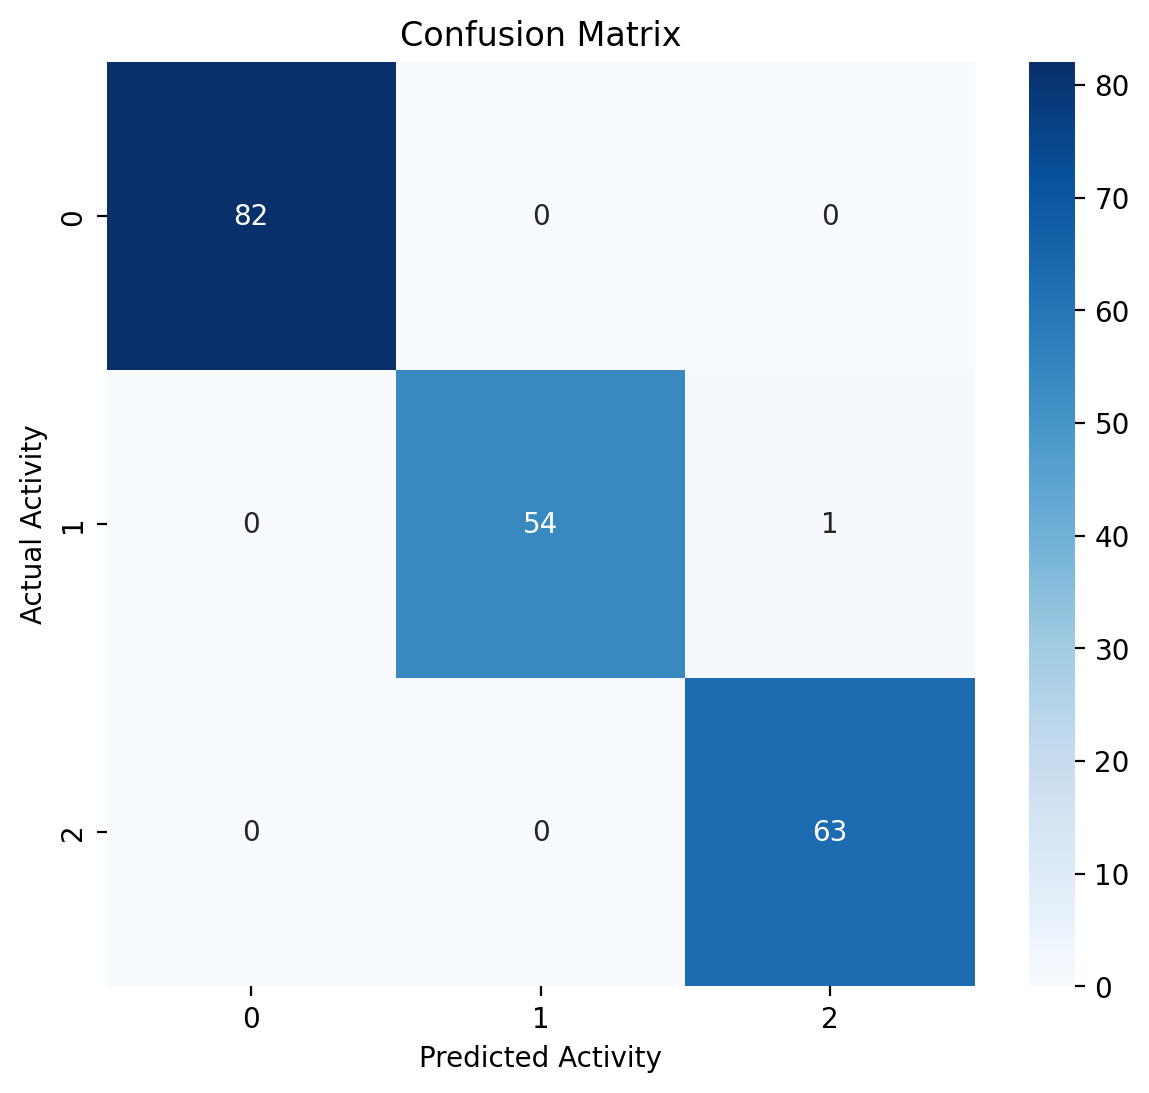

In [ ]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

# print(f'Accuracy Score: ' + '{:.4%}'.format(acc))

### KNearest Neighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.99875

In [ ]:
knn.score(x_test,y_test)

0.995

In [ ]:
y_pred=knn.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:20]

,y_Test,y_pred
0,Medium,Medium
1,Medium,Medium
2,Medium,Medium
3,High,High
4,Medium,Medium
5,Medium,Medium
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,Medium,Medium


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn = knn2.predict(x_test_scaled)

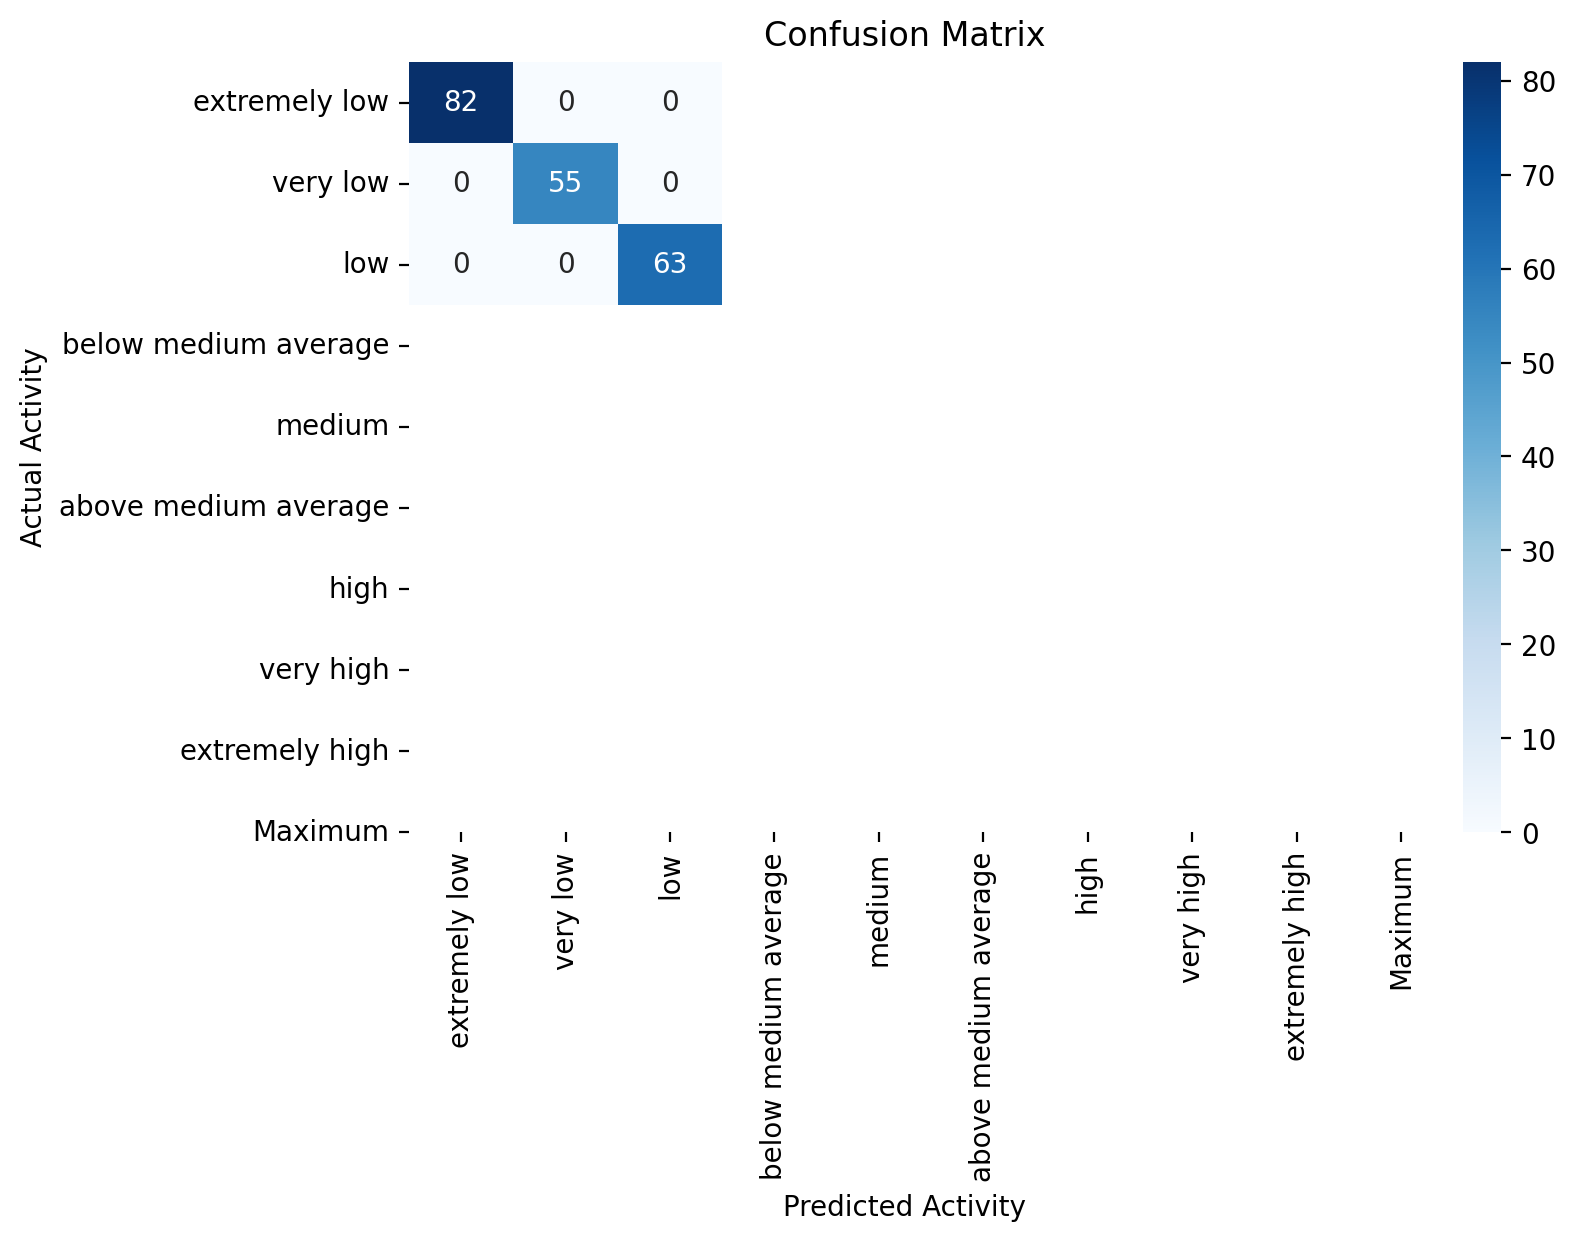

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
resultsSummarizer(y_test, y_pred_knn)

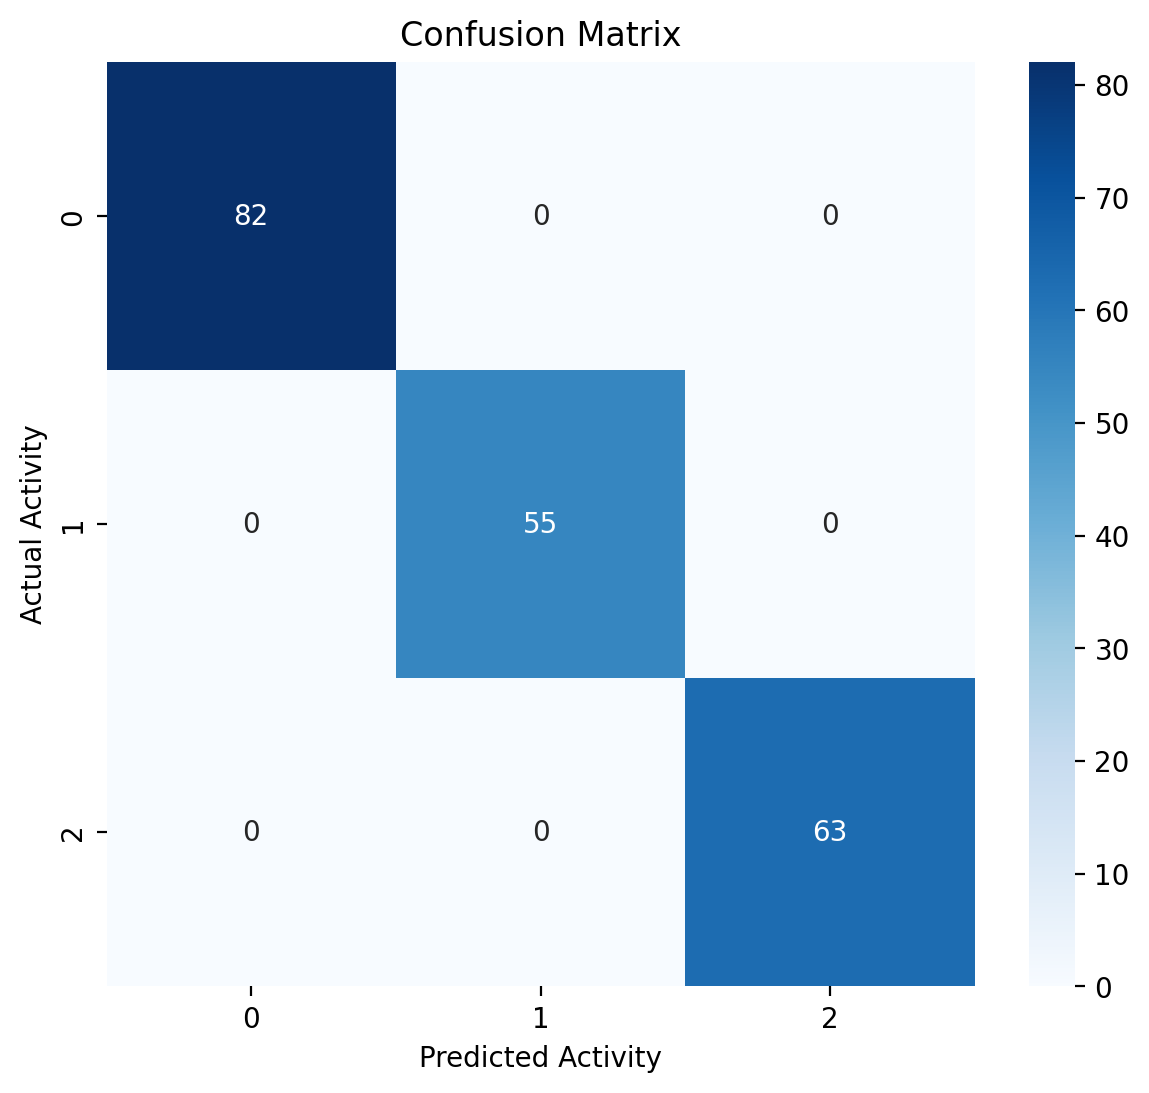

In [ ]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)

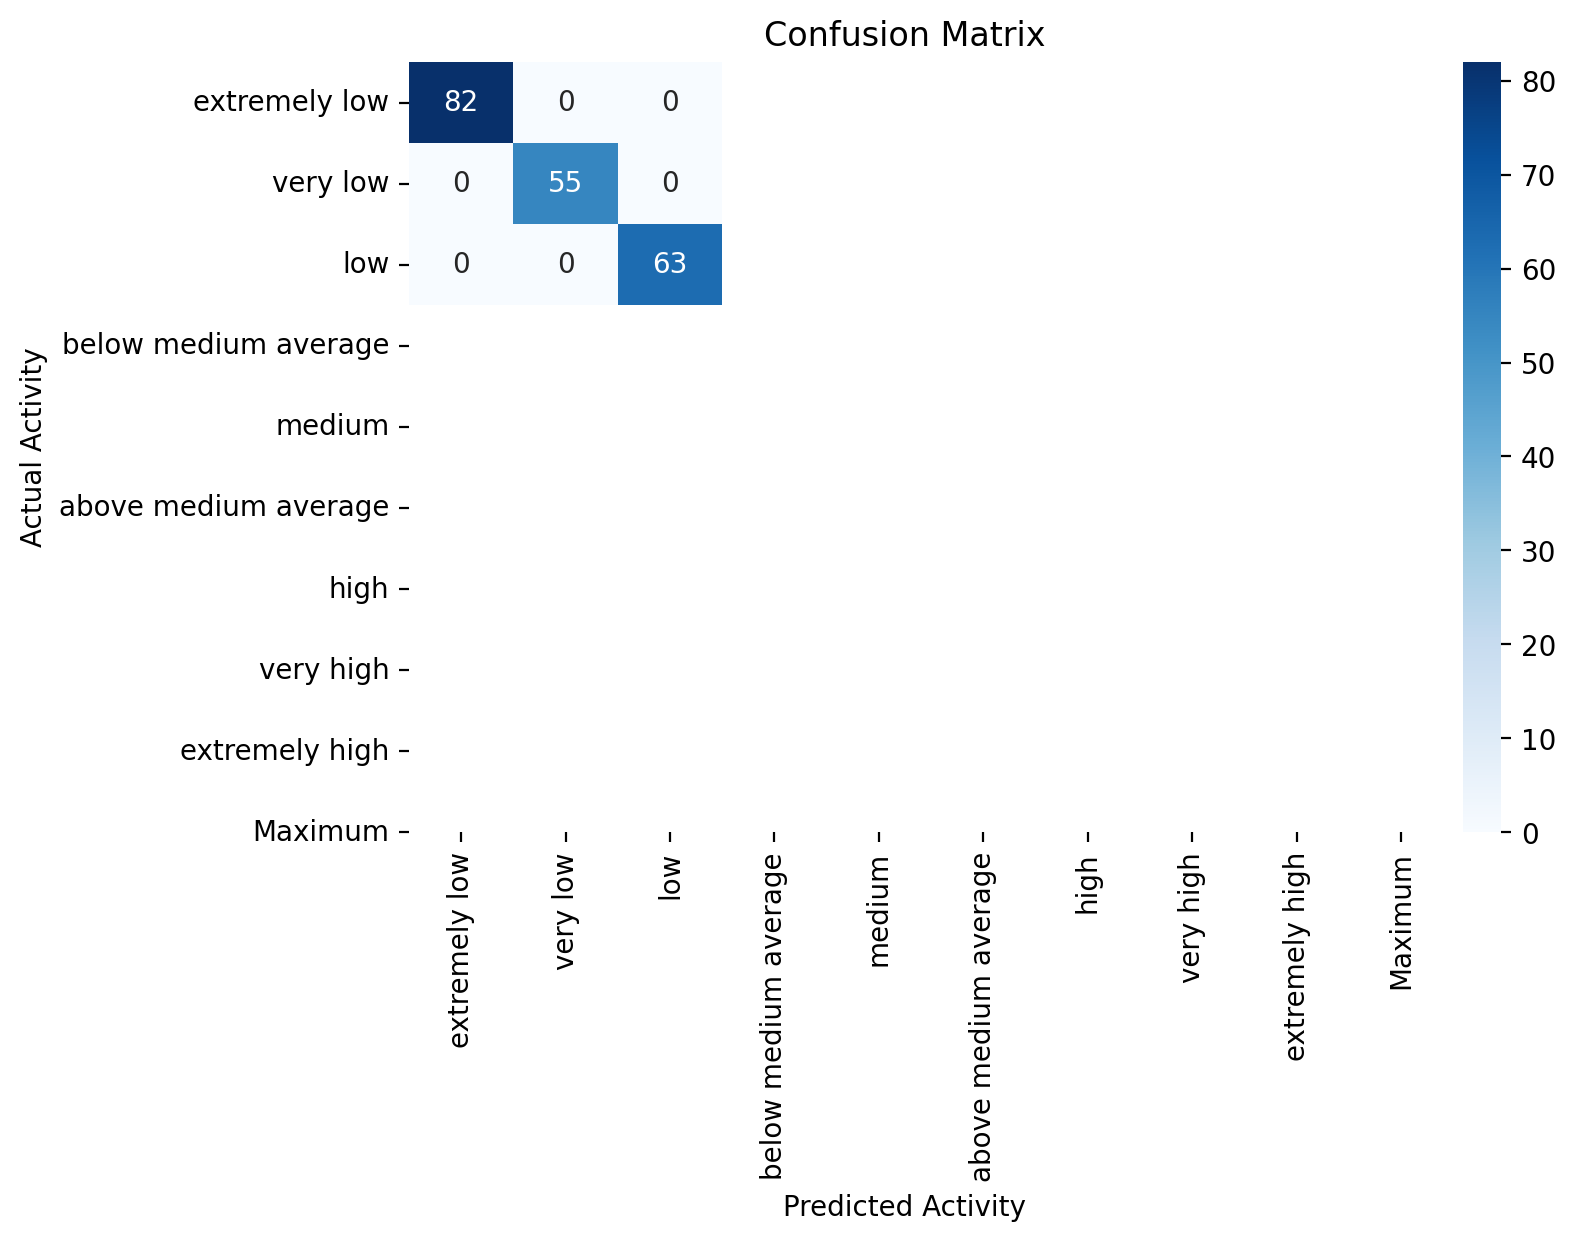

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
resultsSummarizer(y_pred_rf, y_test)

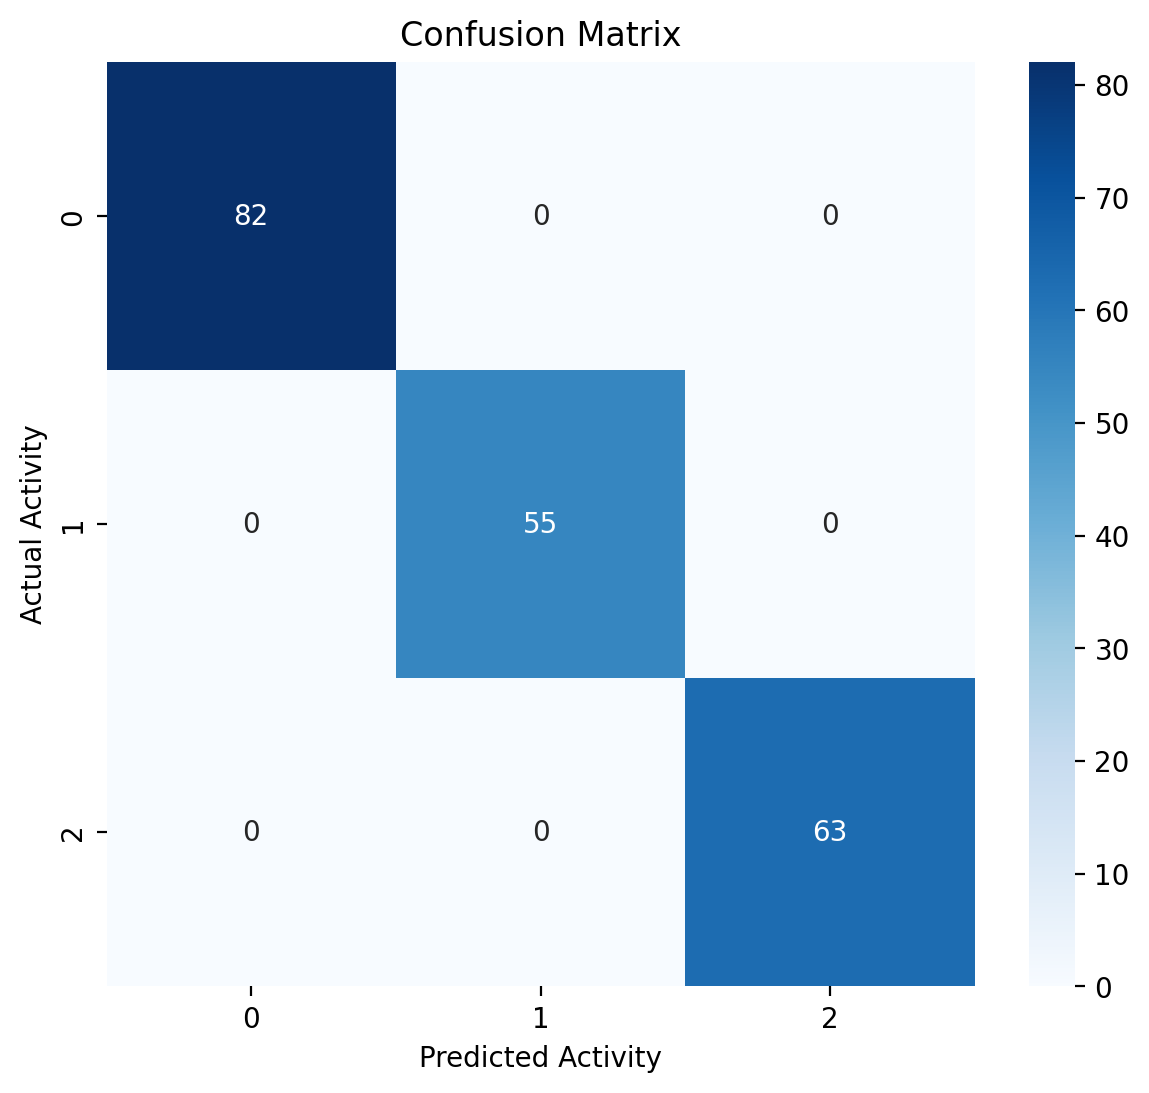

In [ ]:
plt.figure(figsize=(7, 6)) 
cm=confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm,annot=True, cmap='Blues') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Activity')
plt.ylabel('Actual Activity')
plt.show()

### Deep Learning model

In [ ]:
df7 = pd.read_csv("/content/cancer-patient-datasets.csv")

In [ ]:
df7.Level = df7.Level.replace("Low", 0)
df7.Level = df7.Level.replace("Medium", 1)
df7.Level = df7.Level.replace("High", 2)
df7.Level = df7.Level.astype("int64")

In [ ]:
df7.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
x = df7.drop(["Level","Patient Id","index"], axis = 1)
y = pd.get_dummies(df["level"])

In [ ]:
model = Sequential()
model.add(Dense(8, activation = "relu", input_dim = x.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
#earlyStop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=32)
dlModel = model.fit(x, y, epochs = 200, validation_split = 0.3)

Epoch 1/200
22/22 [==============================] - 1s 17ms/step - loss: 2.9043 - accuracy: 0.3114 - val_loss: 1.8827 - val_accuracy: 0.3400
Epoch 2/200
22/22 [==============================] - 0s 10ms/step - loss: 1.6445 - accuracy: 0.3714 - val_loss: 1.0982 - val_accuracy: 0.4567
Epoch 3/200
22/22 [==============================] - 0s 9ms/step - loss: 1.2660 - accuracy: 0.4357 - val_loss: 1.0084 - val_accuracy: 0.5200
Epoch 4/200
22/22 [==============================] - 0s 8ms/step - loss: 1.1286 - accuracy: 0.4586 - val_loss: 0.9989 - val_accuracy: 0.5733
Epoch 5/200
22/22 [==============================] - 0s 7ms/step - loss: 1.1107 - accuracy: 0.5071 - val_loss: 0.9813 - val_accuracy: 0.5767
Epoch 6/200
22/22 [==============================] - 0s 9ms/step - loss: 1.0680 - accuracy: 0.5186 - val_loss: 0.9606 - val_accuracy: 0.6133
Epoch 7/200
22/22 [==============================] - 0s 7ms/step - loss: 1.0444 - accuracy: 0.5171 - val_loss: 0.9474 - val_accuracy: 0.6033
Epoch 8/200

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 192       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


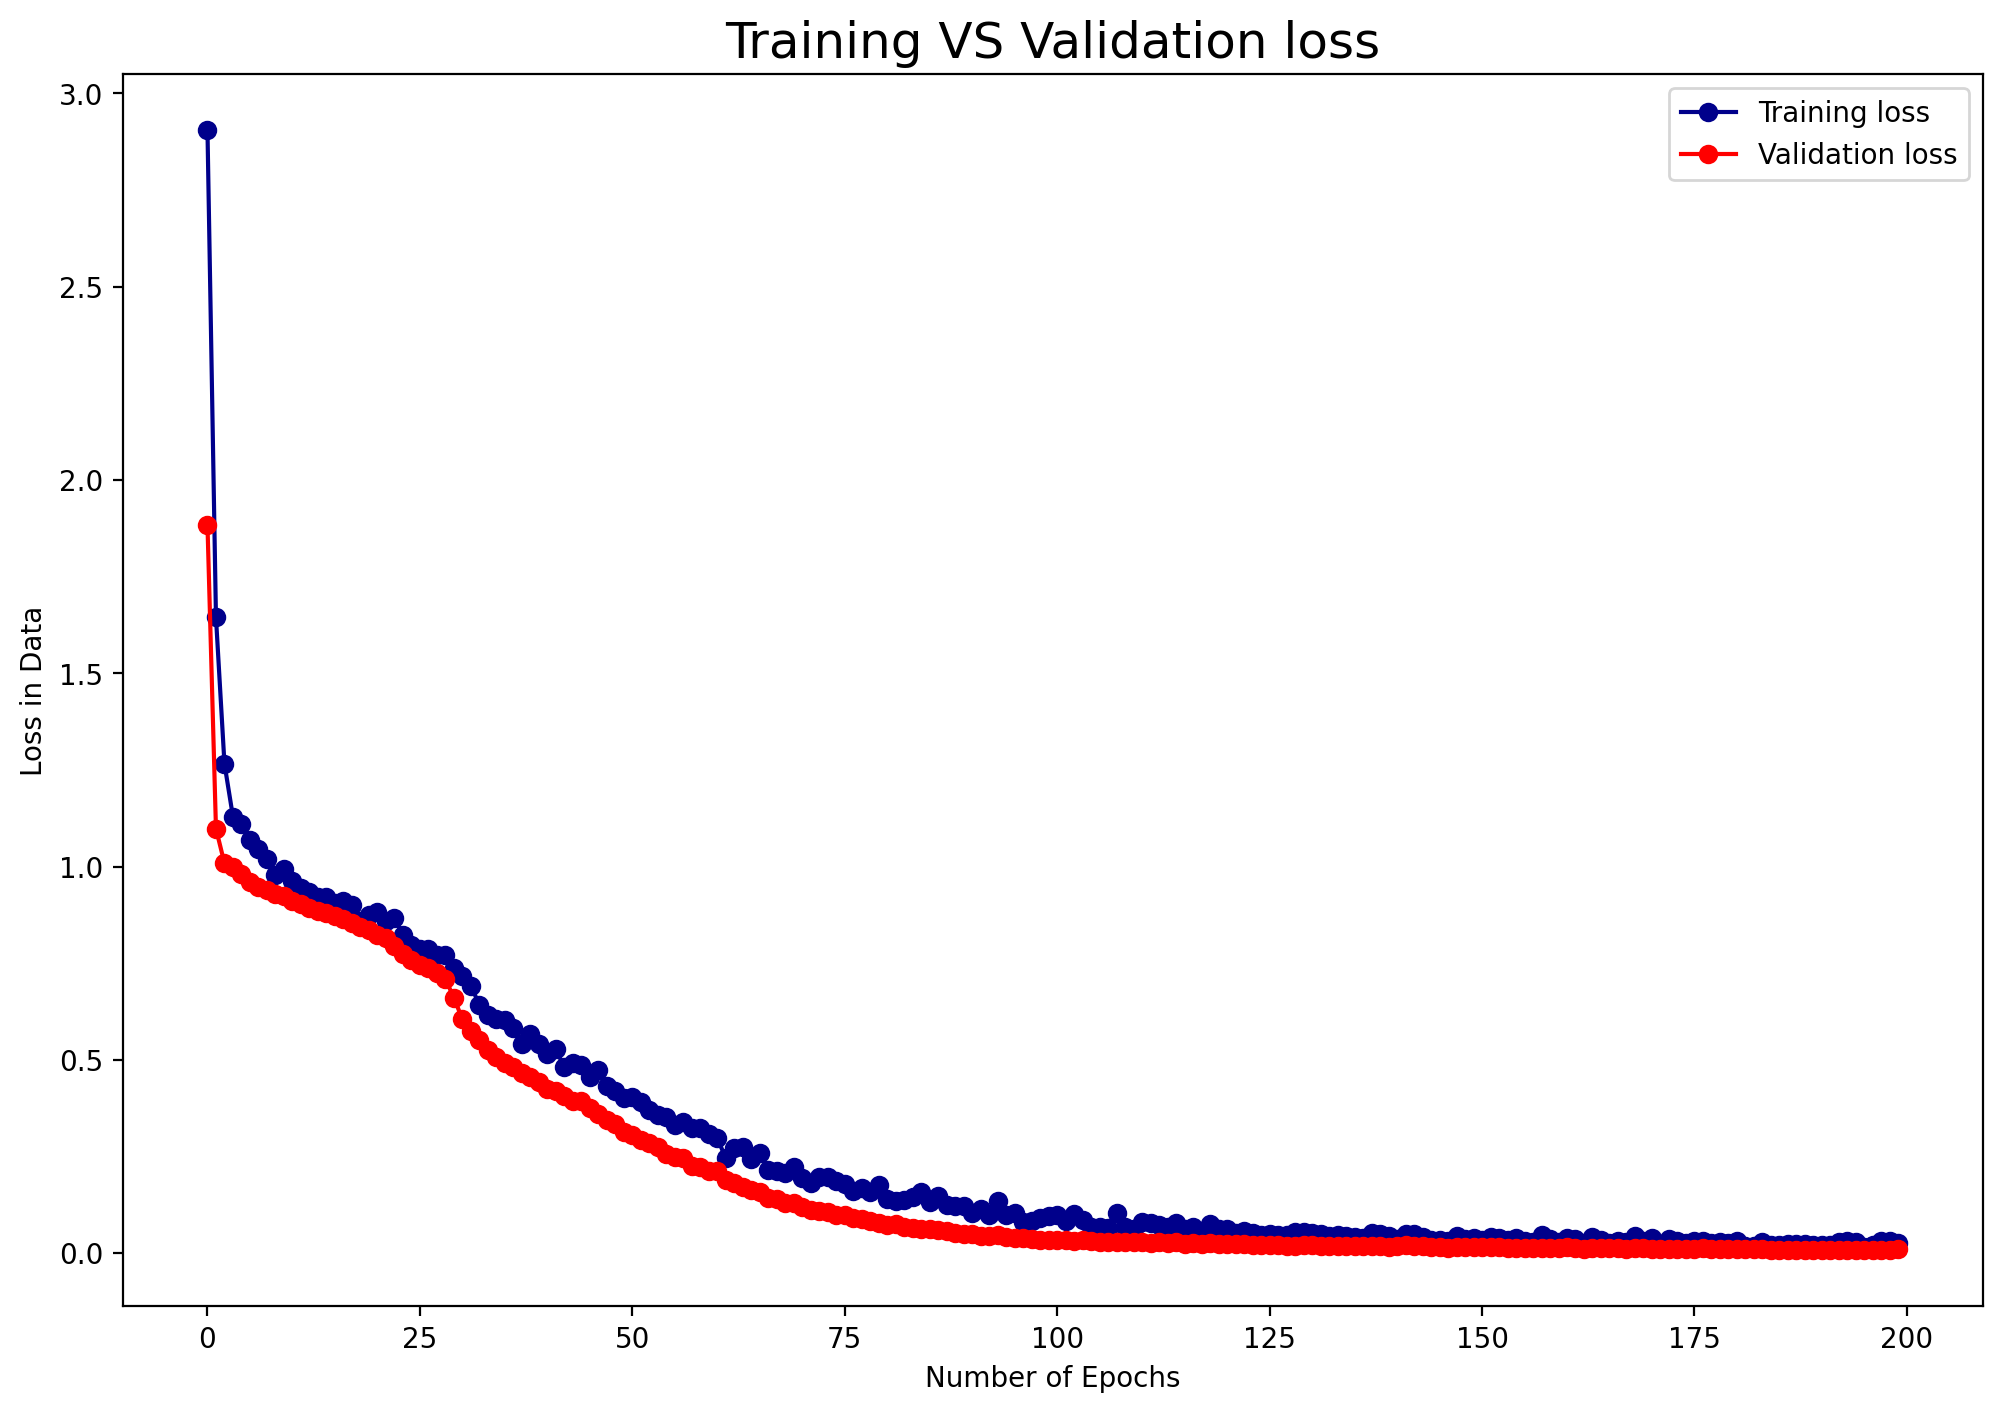

In [ ]:
# drawing a plot to see loss data
plt.figure(figsize = (12,8))
plt.xlabel("Number of Epochs")
plt.ylabel("Loss in Data")
plt.plot(dlModel.history["loss"], label= "Training loss", marker = "o", color = "darkblue",)
plt.plot(dlModel.history["val_loss"], label= "Validation loss", marker = "o", color = "r",)
plt.title("Training VS Validation loss", fontsize = 18)
plt.legend()
plt.show()

In [ ]:
# !pip3 install ann_visualizer

# # pip3 install graphviz

# from ann_visualizer.visualize import ann_viz

# ann_viz(model, view = True, filename = "ann.png")

In [ ]:
# import pandas as pd
# from pandas_profiling import ProfileReport

# # Read the CSV file into a Pandas DataFrame
# df = pd.read_csv('cancer-patient-datasets.csv')

# # Create a profiling report using pandas-profiling
# profile = ProfileReport(df, title='Cancer Patient Profiling Report')

# # Save the report to an HTML file in the same directory as the CSV file
# profile.to_file('cancer_patient_report.html')